In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
warnings.filterwarnings("ignore")

C:\Users\19083\anaconda3\envs\general_DS\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df_excel = pd.ExcelFile('online_retail_II.xlsx')
df_09 = pd.read_excel(df_excel, 'Year 2009-2010')
df_10 = pd.read_excel(df_excel, 'Year 2010-2011')

<AxesSubplot:xlabel='InvoiceDate'>

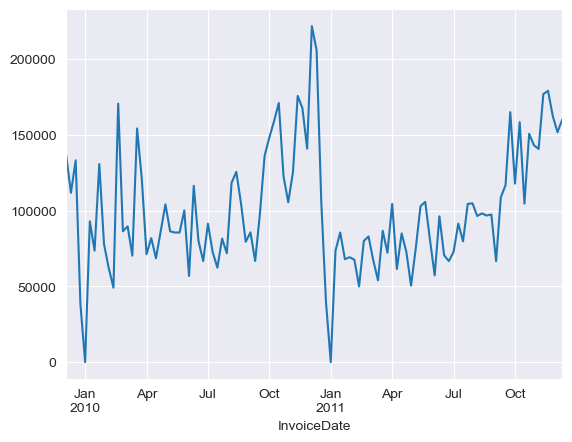

In [4]:
df_a = pd.concat([df_09, df_10])
df_a.reset_index().set_index('InvoiceDate')['Quantity'].resample(rule="W").sum().plot()

In [5]:
df_09_p = df_09[(df_09.Quantity > 0) & (df_09.Price > 0)]
df_09_p['Total'] = df_09.Quantity * df_09.Price
df_09_p.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [6]:
df_09_p.Country.value_counts() / df_09_p.Country.value_counts().sum()

United Kingdom          0.925353
EIRE                    0.018490
Germany                 0.014962
France                  0.010814
Netherlands             0.005335
Spain                   0.002414
Switzerland             0.002287
Portugal                0.002074
Belgium                 0.002027
Sweden                  0.001734
Channel Islands         0.001605
Italy                   0.001388
Australia               0.001232
Cyprus                  0.001058
Austria                 0.001024
Greece                  0.001001
Denmark                 0.000817
United Arab Emirates    0.000780
Norway                  0.000713
Finland                 0.000678
Unspecified             0.000598
USA                     0.000450
Poland                  0.000356
Malta                   0.000332
Japan                   0.000321
Lithuania               0.000301
Singapore               0.000229
RSA                     0.000215
Bahrain                 0.000207
Canada                  0.000151
Thailand  

In [7]:
df_09_sample = df_09.sample(n=10000)
df_10_sample = df_10.sample(n=10000)

In [8]:
df_09_sample['Customer ID'].unique()

array([14461., 16019., 14208., ..., 15920., 17266., 16356.])

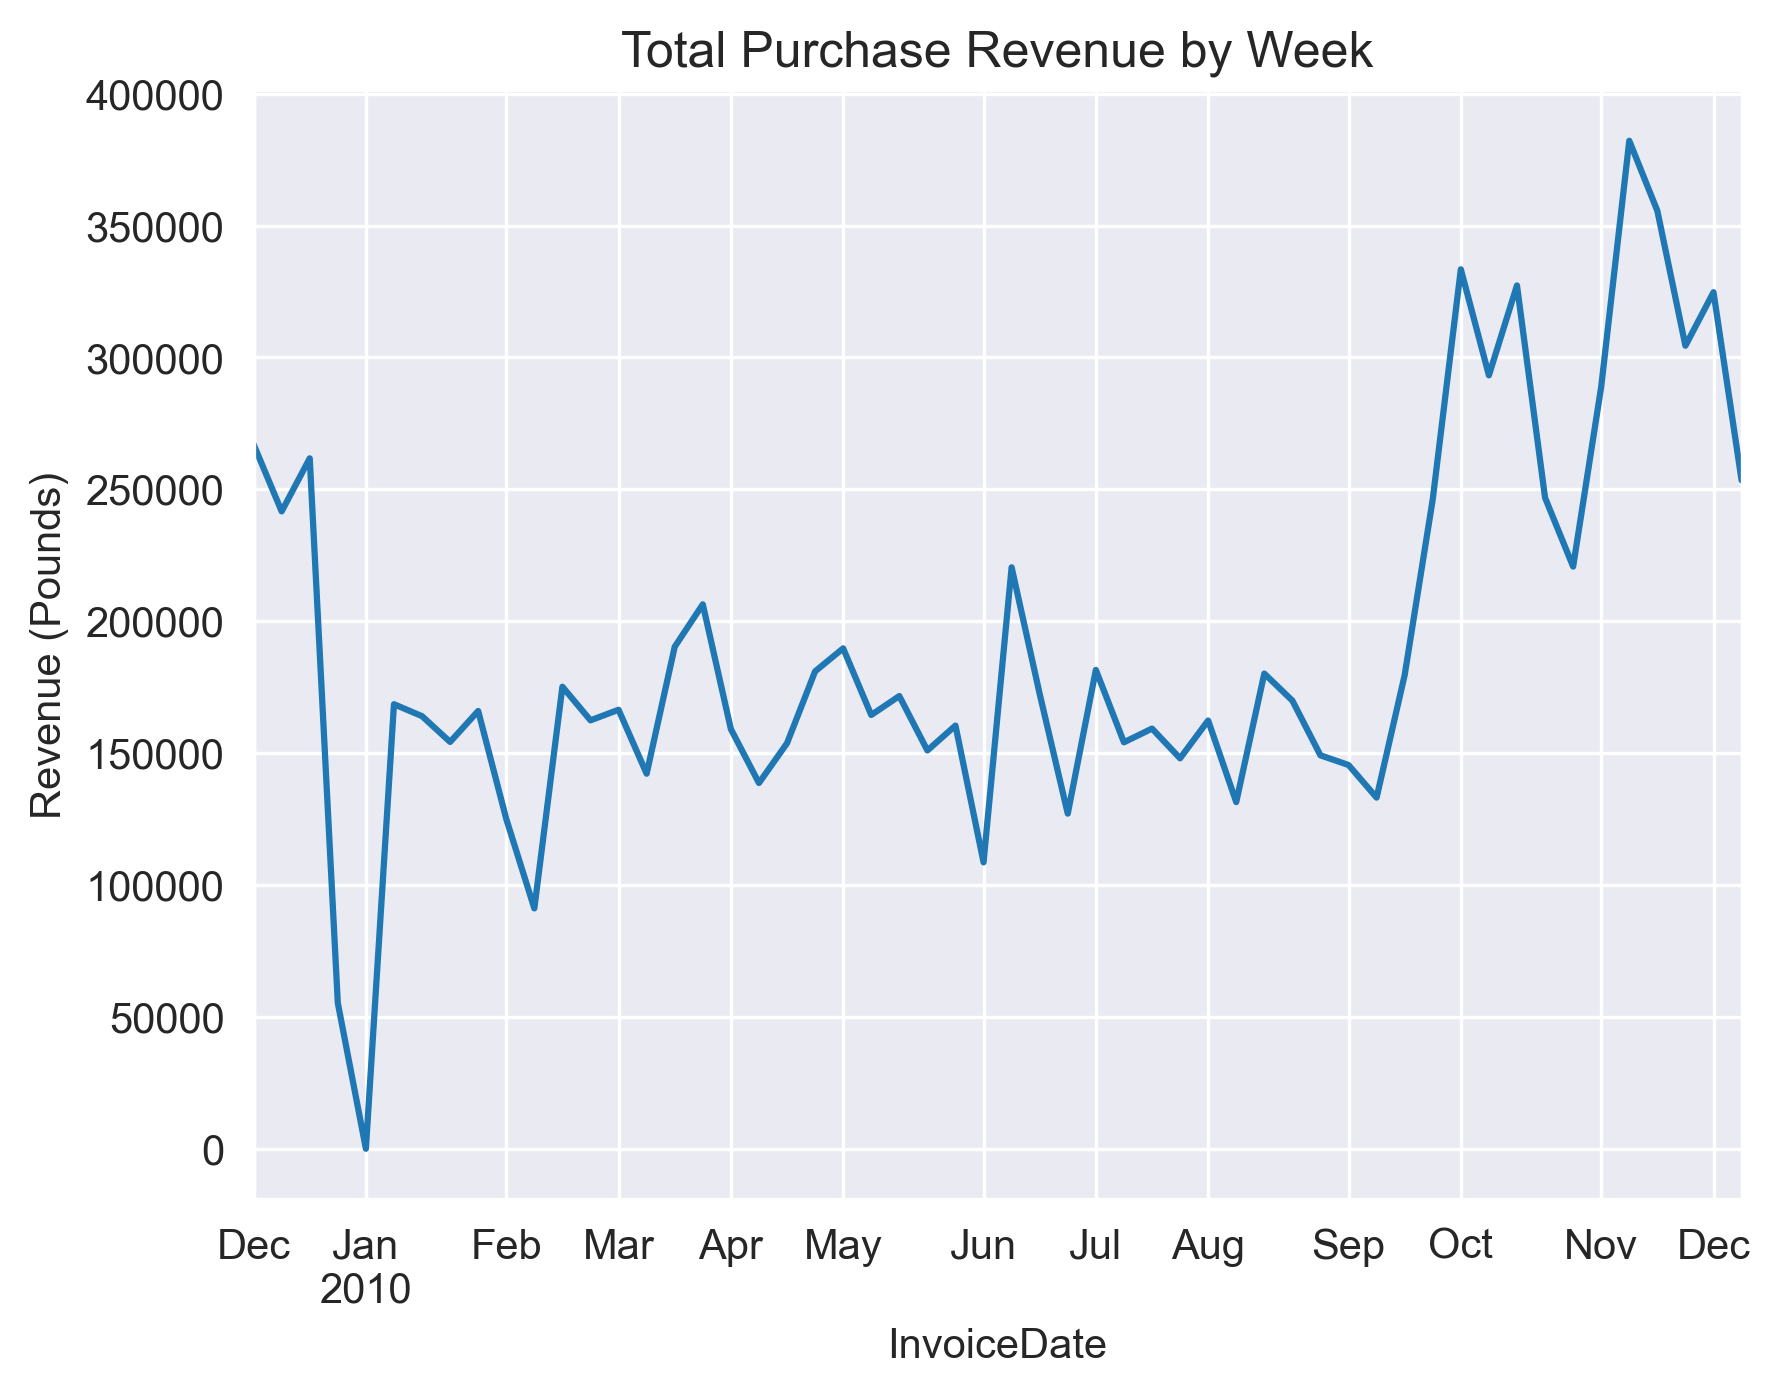

In [9]:
plt.figure(dpi=300)
df_09_p.reset_index().set_index('InvoiceDate')['Total'].resample(rule="W").sum().plot()
plt.title('Total Purchase Revenue by Week')
plt.ylabel('Revenue (Pounds)')
plt.savefig('PurchasesByWeek.png', format='png')

<AxesSubplot:xlabel='InvoiceDate'>

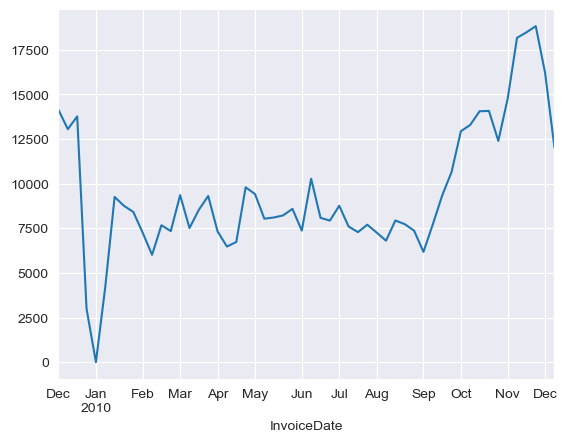

In [10]:
df_09_p.reset_index().set_index('InvoiceDate')['Total'].resample(rule="W").count().plot()

In [11]:
pd.Series(df_09.Quantity > 0).value_counts()

True     513135
False     12326
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Distribution of Transaction Quantity')

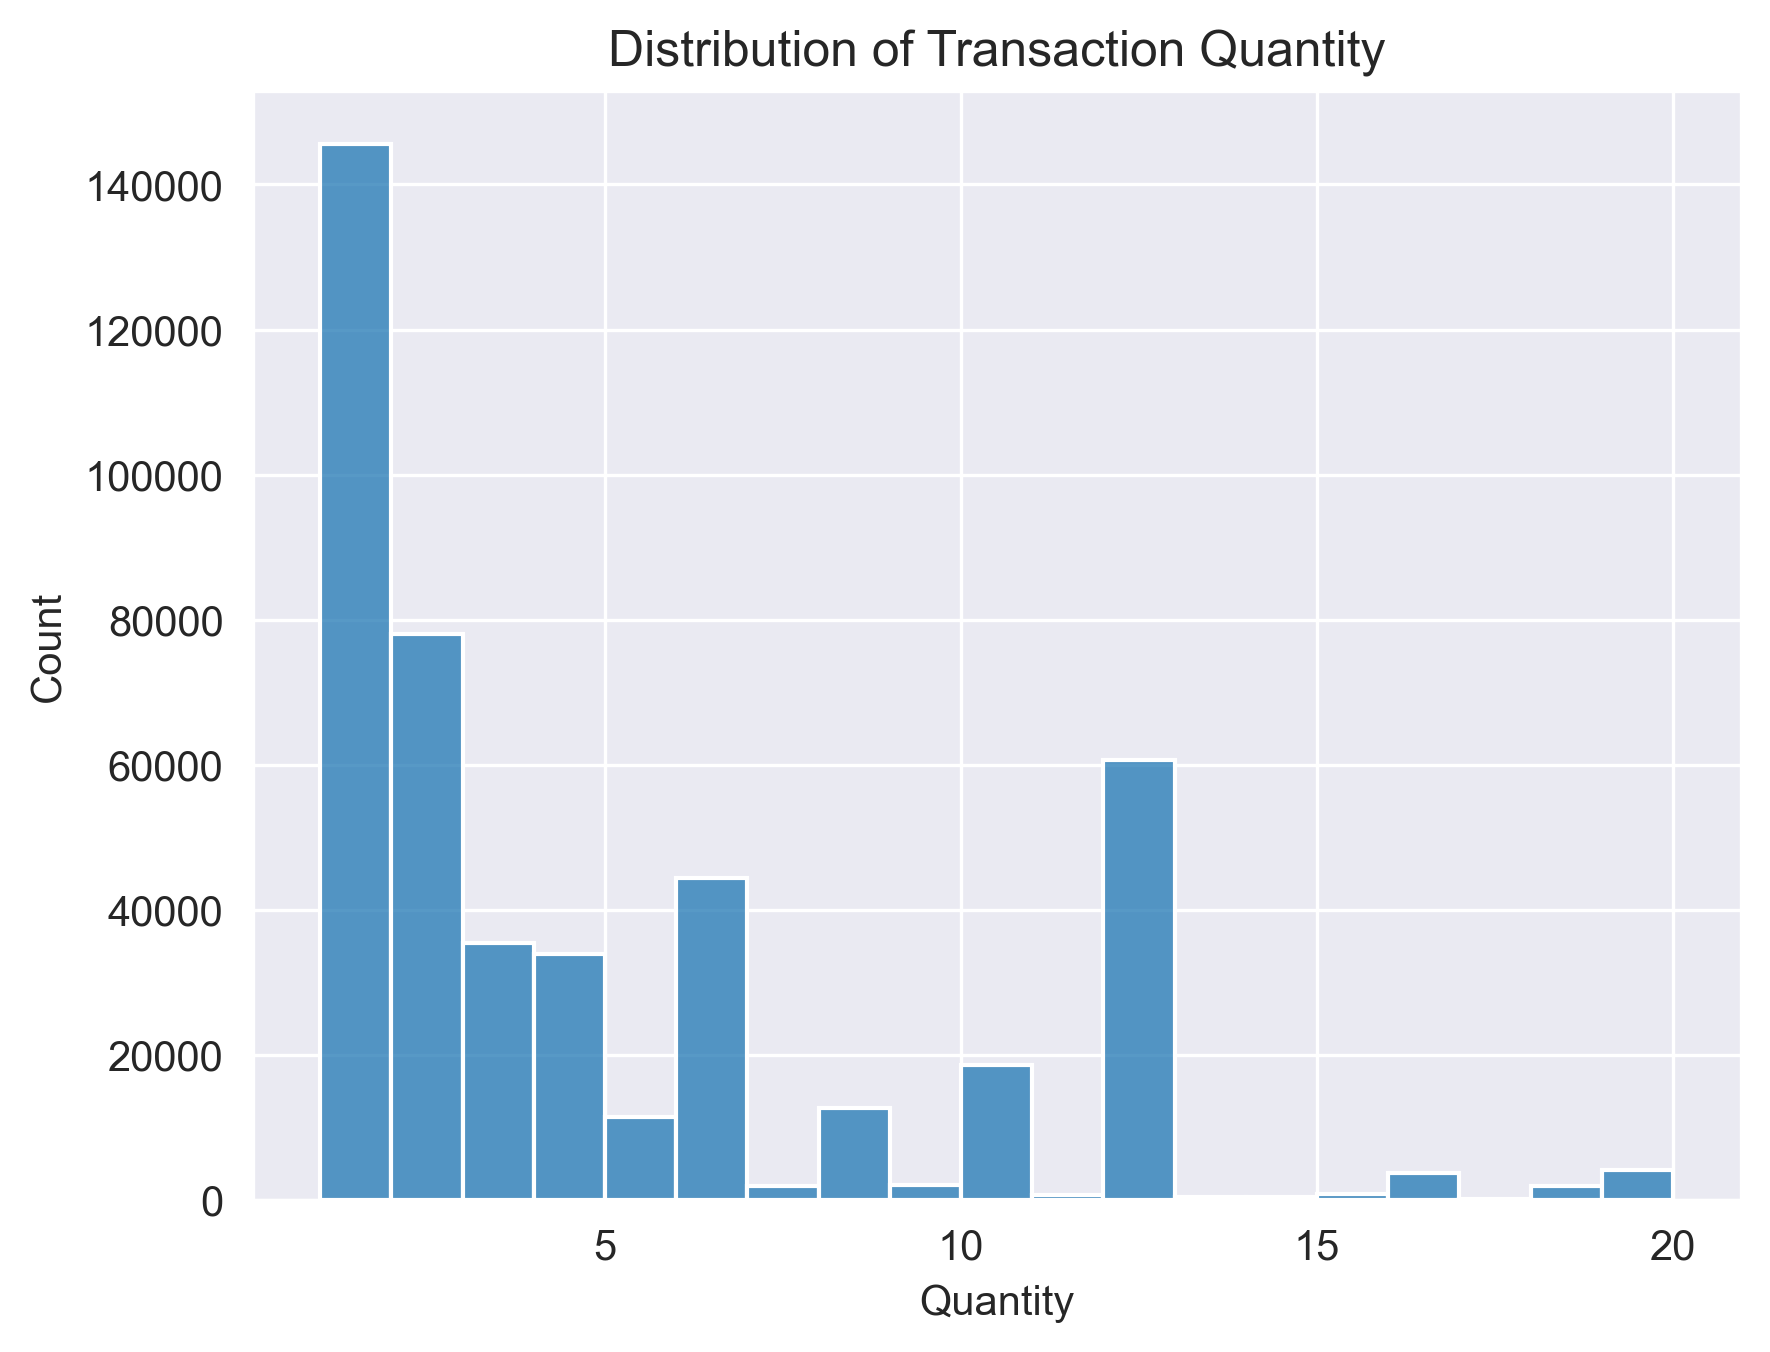

In [12]:
plt.figure(dpi=300)
sns.histplot(df_09_p.Quantity, binwidth=1, binrange=[1,20])
plt.locator_params(integer=True)
plt.title('Distribution of Transaction Quantity')

Text(0.5, 0, 'Price (GBP)')

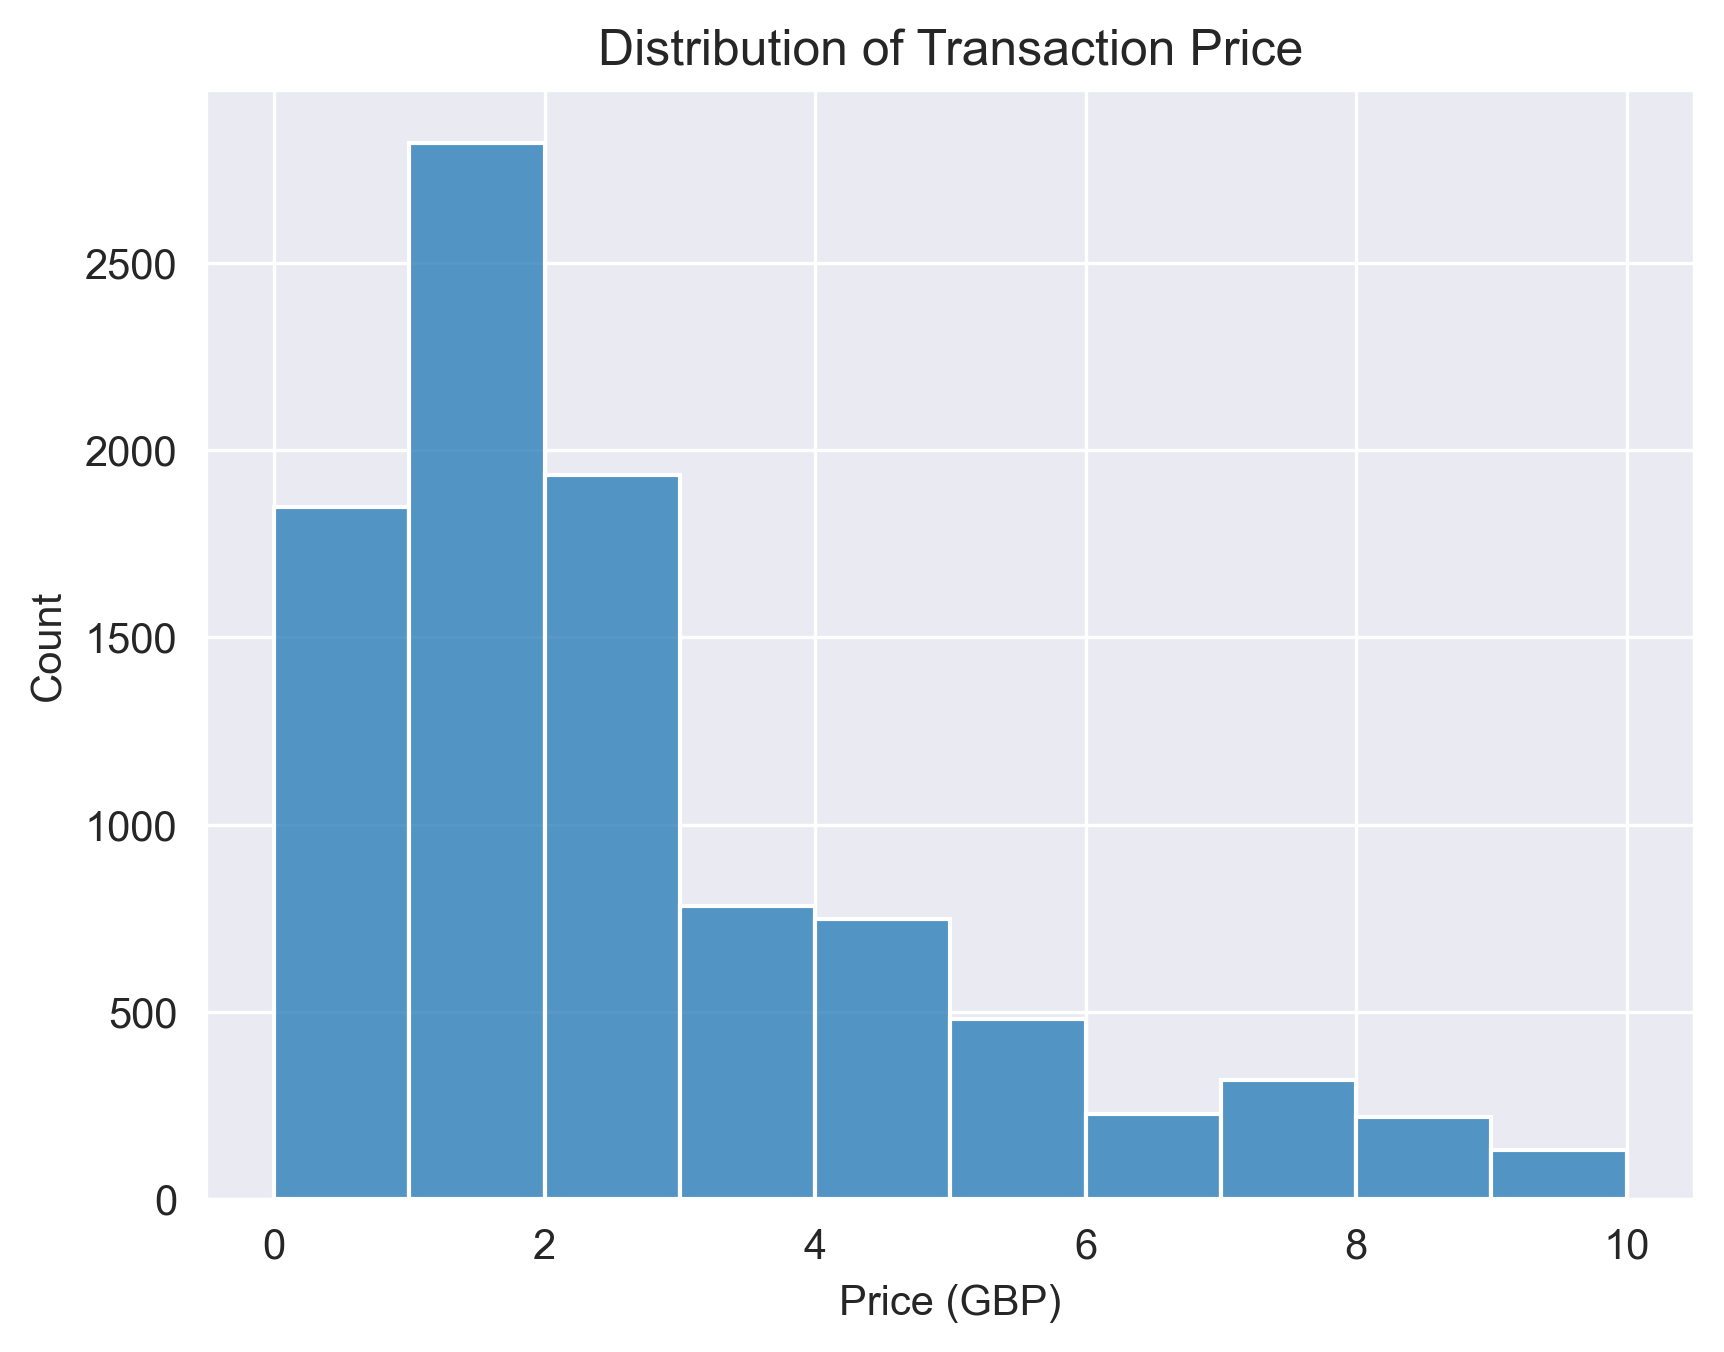

In [13]:
plt.figure(dpi=300)
sns.histplot(df_09_sample.Price, binwidth=1, binrange=[0,10])
plt.title('Distribution of Transaction Price')
plt.xlabel('Price (GBP)')

In [14]:
df_09_p.Price.describe()

count    511566.000000
mean          4.252563
std          63.664629
min           0.001000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Number of Transactions per Customer')

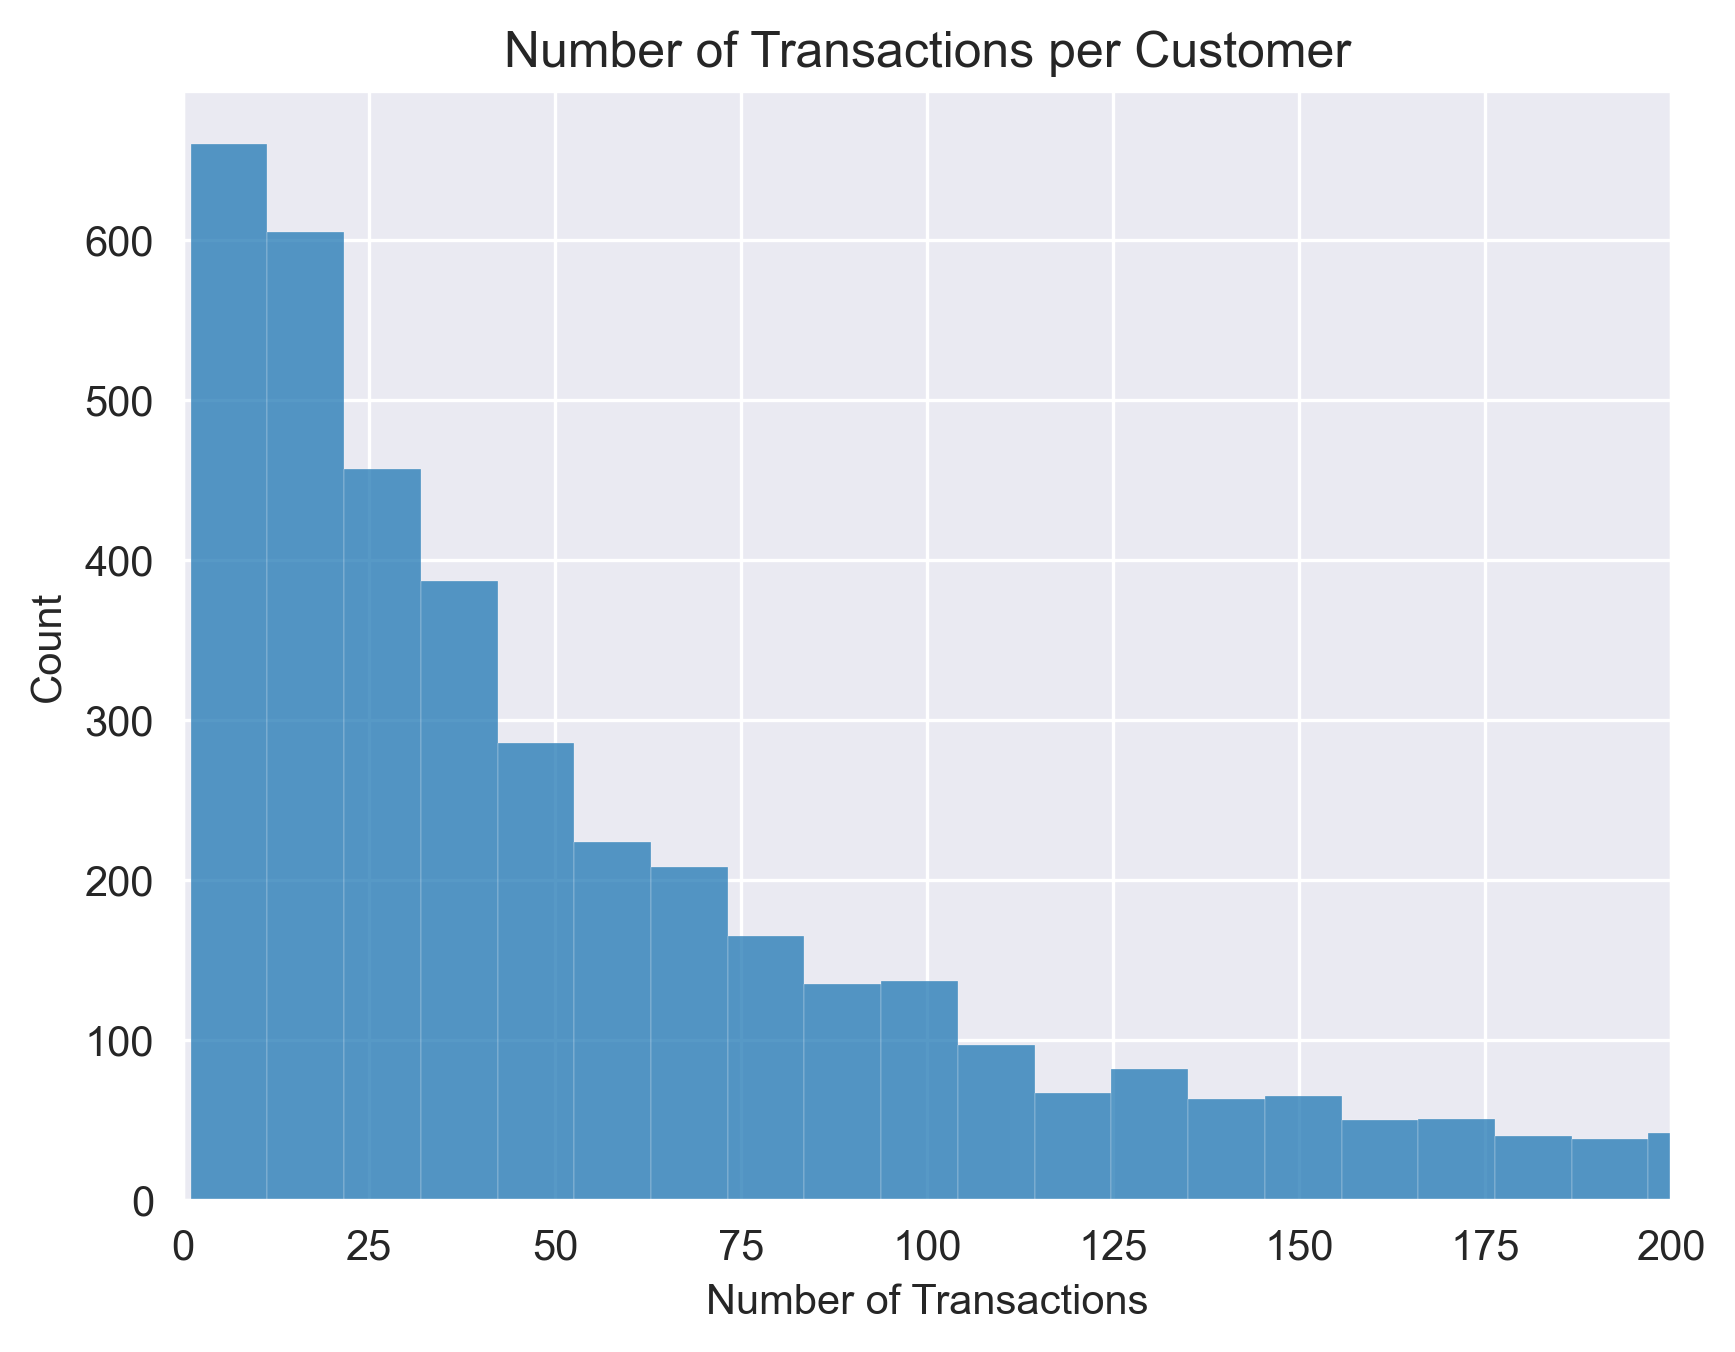

In [15]:
plt.figure(dpi=300)
sns.histplot(df_09_p['Customer ID'].value_counts())
plt.xlim([0,200])
plt.xlabel('Number of Transactions')
plt.title('Number of Transactions per Customer')

Text(0.5, 0, 'Customer Value (GBP)')

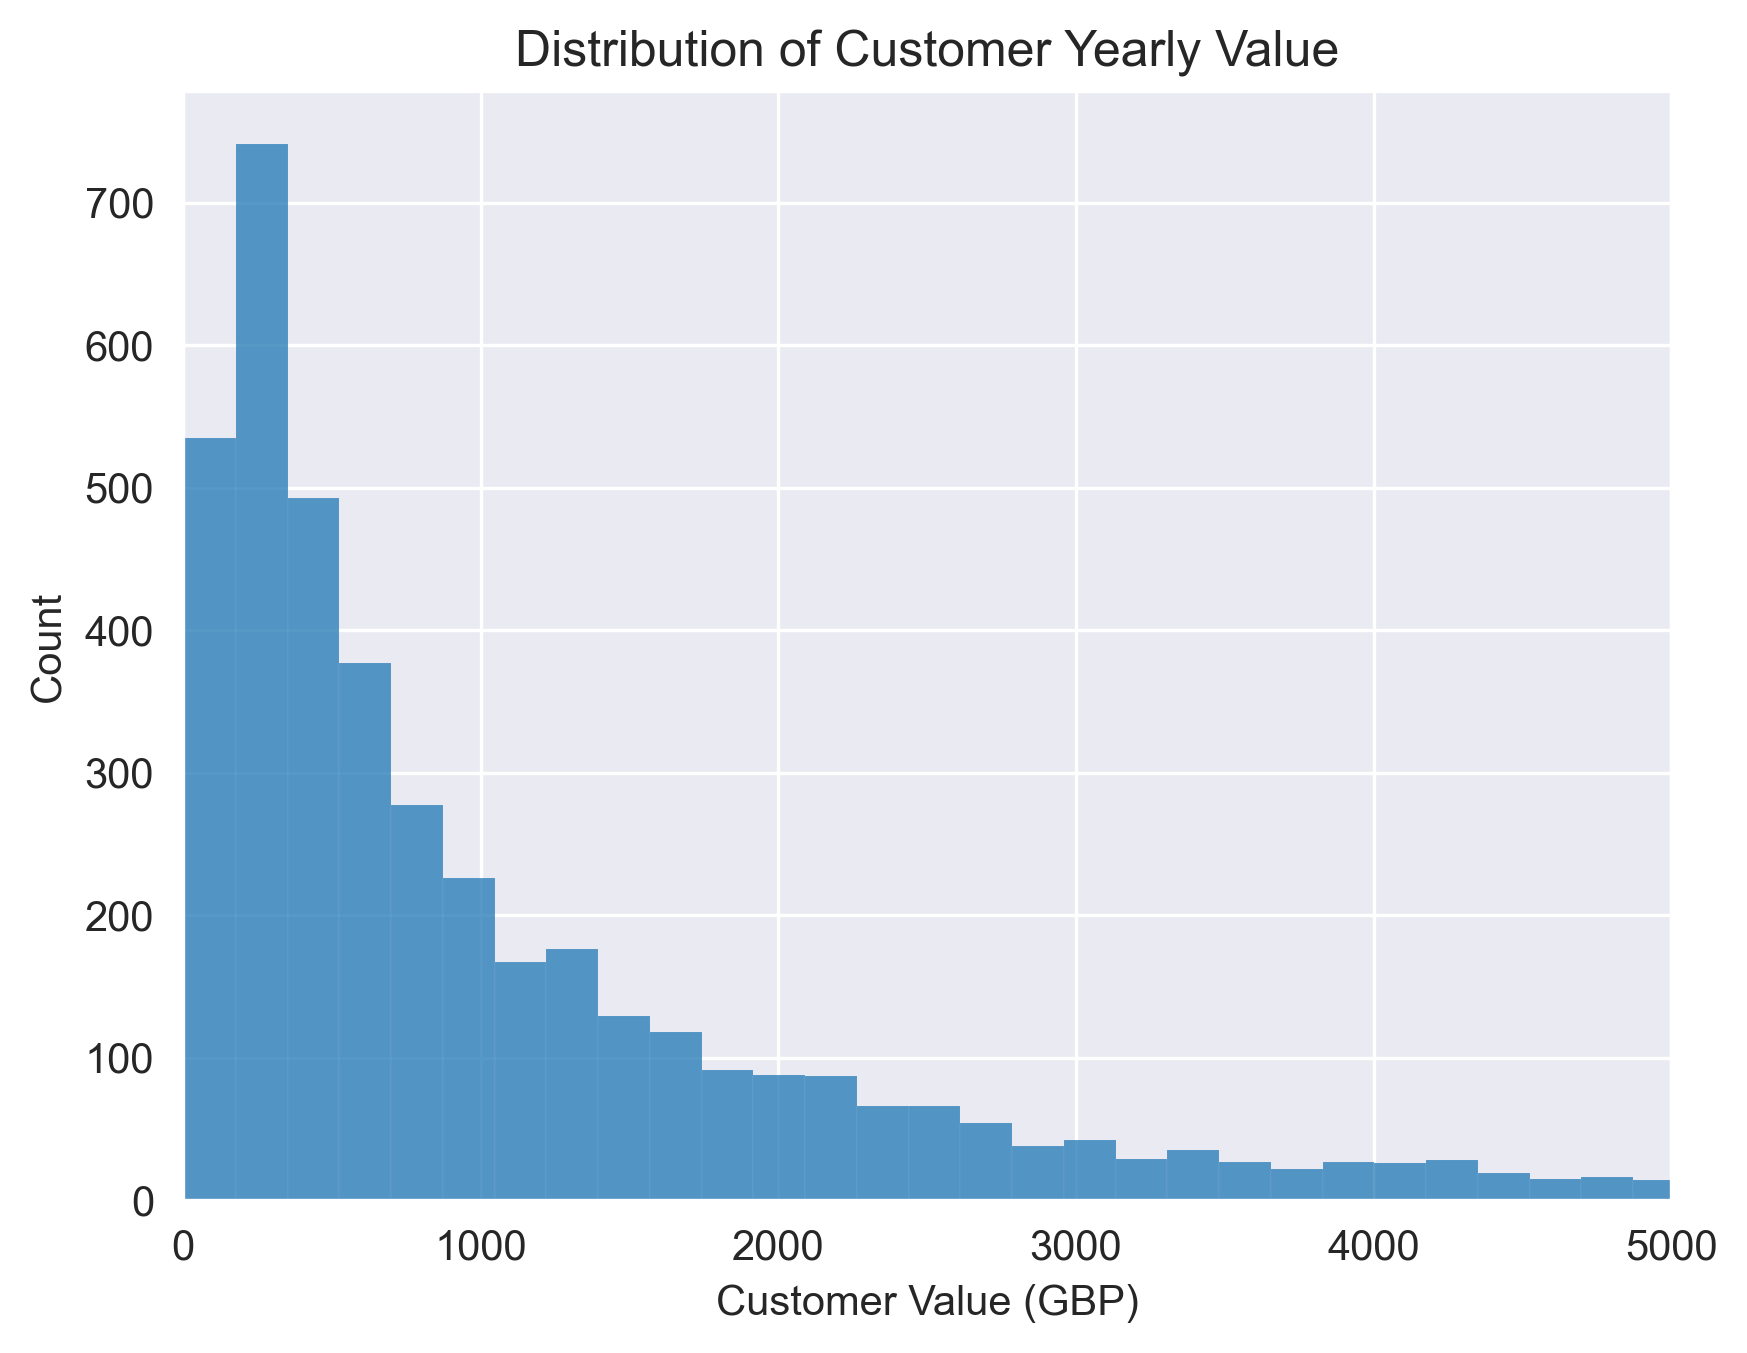

In [16]:
plt.figure(dpi=300)
sns.histplot(df_09_p.groupby('Customer ID')['Total'].sum().values)
plt.xlim([0,5000])
plt.title('Distribution of Customer Yearly Value')
plt.xlabel('Customer Value (GBP)')

In [17]:
df_09_p.groupby('Customer ID')['Total'].sum().describe()

count      4312.000000
mean       2048.238236
std        8914.481280
min           2.950000
25%         307.987500
50%         706.020000
75%        1723.142500
max      349164.350000
Name: Total, dtype: float64

Text(0.5, 1.0, 'Number of Customers by Country in Sample')

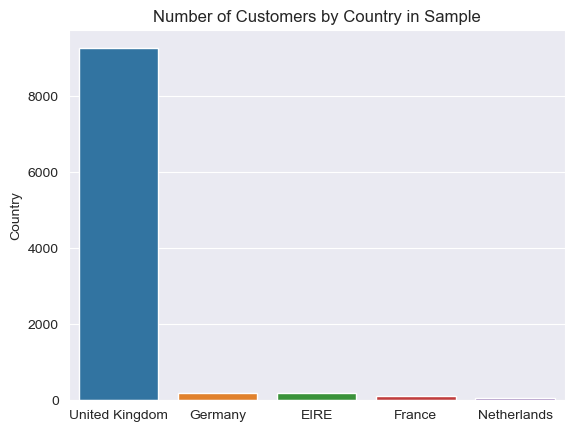

In [18]:
sns.barplot(x=df_09_sample.Country.value_counts()[:5].index, y=df_09_sample.Country.value_counts()[:5])
plt.title('Number of Customers by Country in Sample')

In [19]:
df_09['Customer ID'].value_counts().describe()

count    4383.000000
mean       95.262149
std       204.903882
min         1.000000
25%        18.000000
50%        44.000000
75%       103.000000
max      5710.000000
Name: Customer ID, dtype: float64

In [20]:
df_09_sample.StockCode.value_counts().describe()

count    2451.000000
mean        4.079967
std         4.646892
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        63.000000
Name: StockCode, dtype: float64

In [21]:
df_09_p_recency = df_09_p.groupby('Customer ID', as_index=False)['InvoiceDate'].max()
df_09_p_recency.columns = ['Customer ID', 'LastTransactionDate']
most_recent = df_09_p_recency['LastTransactionDate'].max()
df_09_p_recency['Recency'] = df_09_p_recency['LastTransactionDate'].apply(lambda x: (most_recent - x).days)
df_09_p_recency

,Customer ID,LastTransactionDate,Recency
0,12346.0,2010-06-28 13:53:00,164
1,12347.0,2010-12-07 14:57:00,2
2,12348.0,2010-09-27 14:59:00,73
3,12349.0,2010-10-28 08:23:00,42
4,12351.0,2010-11-29 15:23:00,10
...,...,...,...
4307,18283.0,2010-11-22 15:30:00,17
4308,18284.0,2010-10-04 11:33:00,66
4309,18285.0,2010-02-17 10:24:00,295
4310,18286.0,2010-08-20 11:57:00,111


In [22]:
df_09_p_frequency = df_09_p.groupby('Customer ID', as_index=False)['InvoiceDate'].count()
df_09_p_frequency.columns = ['Customer ID', 'Frequency']
df_09_p_frequency.head()

,Customer ID,Frequency
0,12346.0,33
1,12347.0,71
2,12348.0,20
3,12349.0,102
4,12351.0,21


In [23]:
df_09_p_monetary = df_09_p.groupby('Customer ID', as_index=False)['Total'].sum()
df_09_p_monetary.columns = ['Customer ID', 'Monetary']
df_09_p_monetary.head()

,Customer ID,Monetary
0,12346.0,372.86
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2671.14
4,12351.0,300.93


In [24]:
df_09_p_rf = df_09_p_recency.merge(df_09_p_frequency, on='Customer ID')
rfm = df_09_p_rf.merge(df_09_p_monetary, on="Customer ID")
rfm

,Customer ID,LastTransactionDate,Recency,Frequency,Monetary
0,12346.0,2010-06-28 13:53:00,164,33,372.86
1,12347.0,2010-12-07 14:57:00,2,71,1323.32
2,12348.0,2010-09-27 14:59:00,73,20,222.16
3,12349.0,2010-10-28 08:23:00,42,102,2671.14
4,12351.0,2010-11-29 15:23:00,10,21,300.93
...,...,...,...,...,...
4307,18283.0,2010-11-22 15:30:00,17,230,641.77
4308,18284.0,2010-10-04 11:33:00,66,28,461.68
4309,18285.0,2010-02-17 10:24:00,295,12,427.00
4310,18286.0,2010-08-20 11:57:00,111,67,1296.43


Text(0.5, 1.0, 'Days Since Last Purchase')

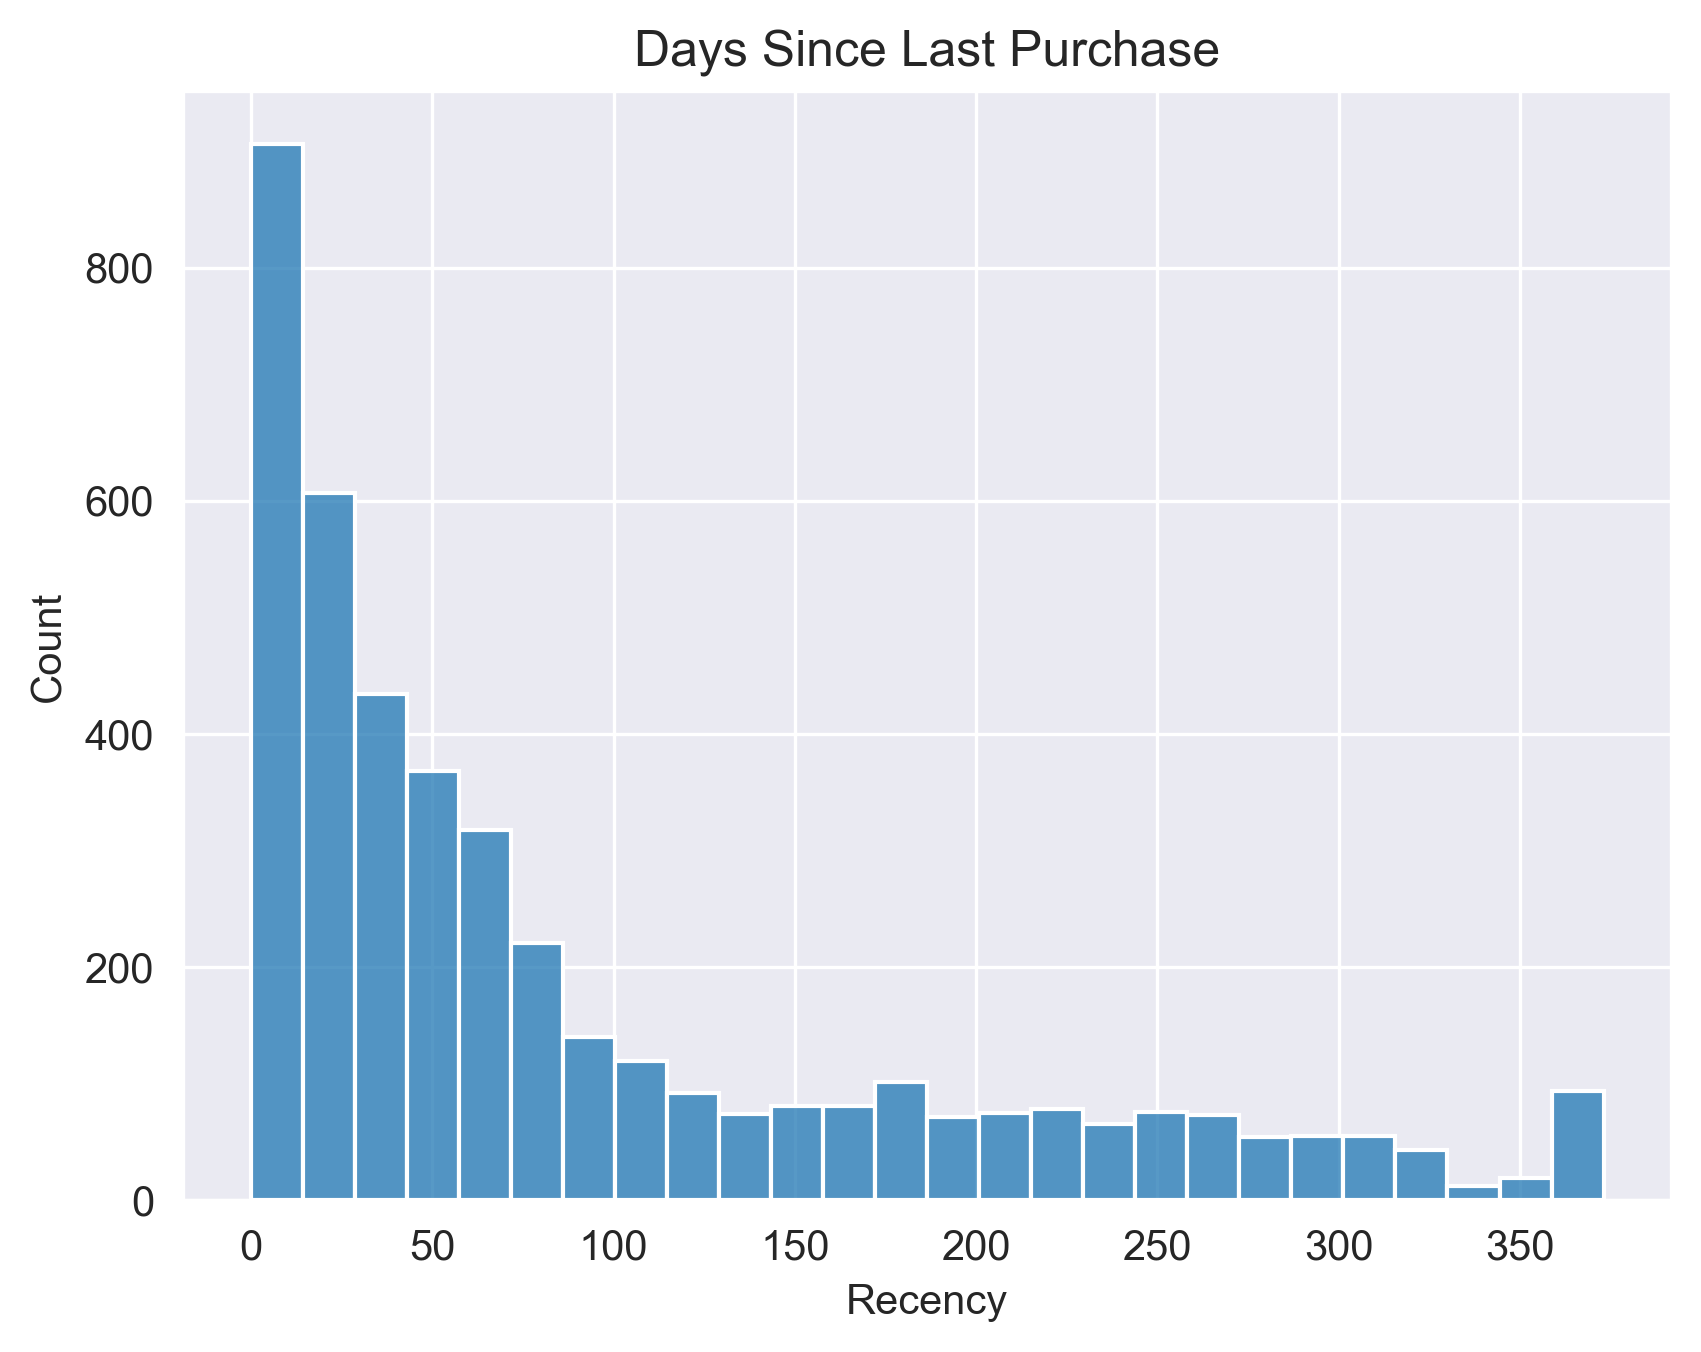

In [25]:
plt.figure(dpi=300)
sns.histplot(rfm.Recency)
plt.title("Days Since Last Purchase")

In [26]:
rfm.Recency.describe()

count    4312.000000
mean       90.171846
std        96.860633
min         0.000000
25%        17.000000
50%        52.000000
75%       135.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 0, 'Top n Highest Grossing Items')

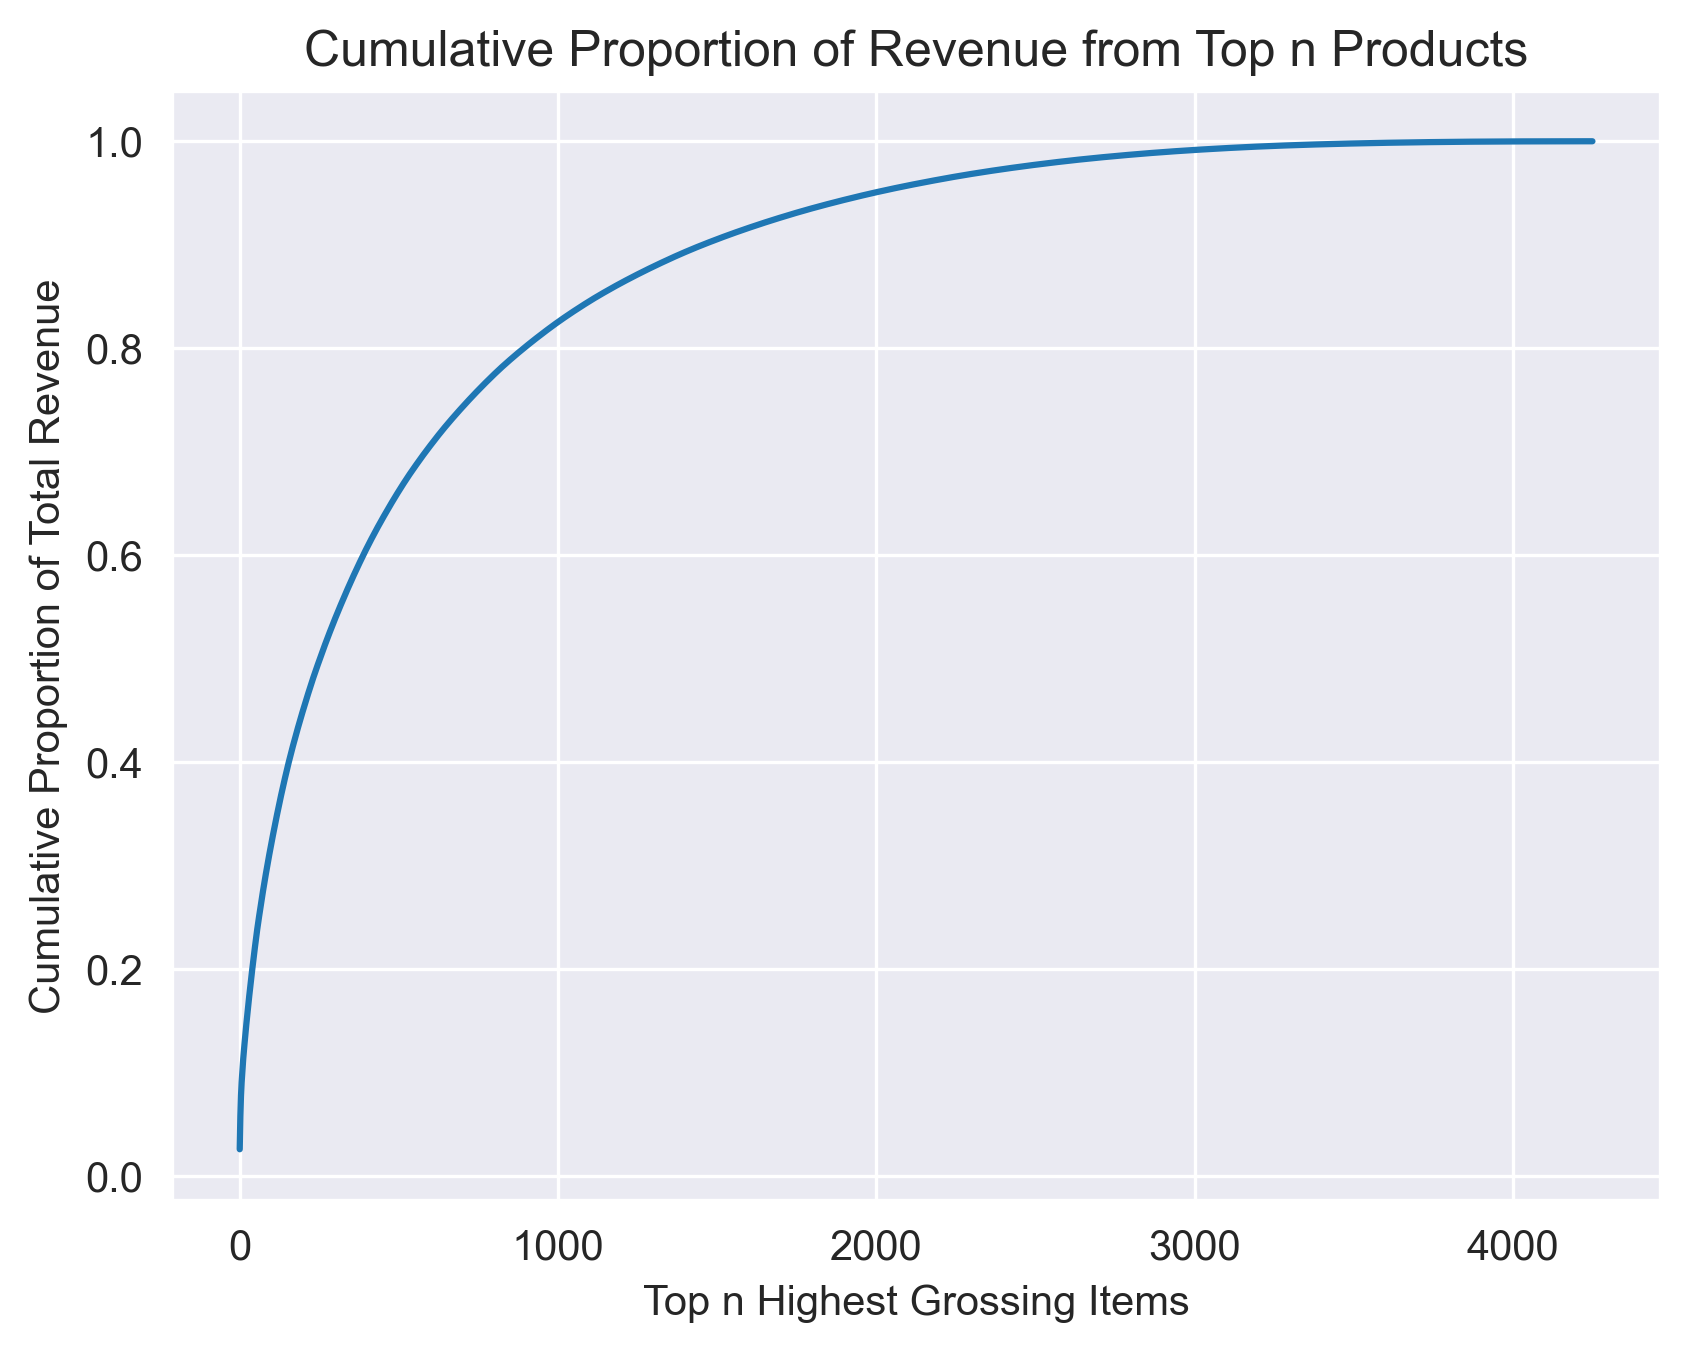

In [27]:
plt.figure(dpi=300)
(df_09_p.groupby('StockCode', as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).reset_index()['Total'].cumsum()/df_09_p['Total'].sum()).plot()
plt.title('Cumulative Proportion of Revenue from Top n Products')
plt.ylabel('Cumulative Proportion of Total Revenue')
plt.xlabel('Top n Highest Grossing Items')

In [28]:
(df_09_p.groupby('StockCode', as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).reset_index()['Total'].cumsum()/df_09_p['Total'].sum())[2000]

0.9507210842406714

In [29]:
df_09_p.StockCode.value_counts()

85123A    3421
22423     2044
85099B    2012
21212     1920
21232     1713
          ... 
35999        1
84509e       1
85132c       1
47590a       1
21120        1
Name: StockCode, Length: 4251, dtype: int64

(0.0, 10000.0)

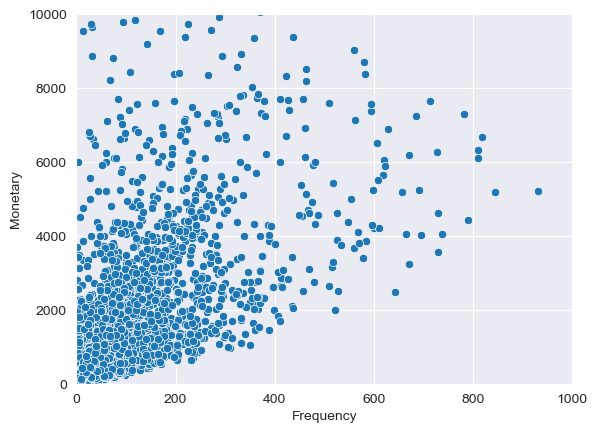

In [30]:
sns.scatterplot(rfm.Frequency, rfm.Monetary)
plt.xlim([0,1000])
plt.ylim([0,10000])

<AxesSubplot:xlabel='Frequency'>

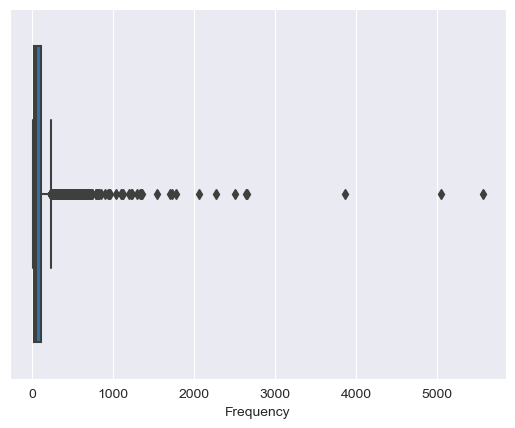

In [31]:
sns.boxplot(rfm['Frequency'])

<AxesSubplot:xlabel='Monetary'>

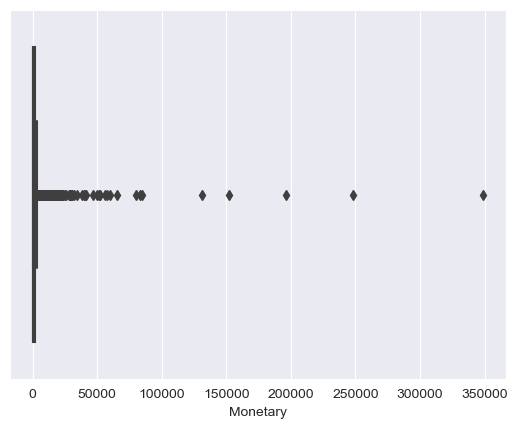

In [32]:
sns.boxplot(rfm.Monetary)

Text(0.5, 0, 'Recency')

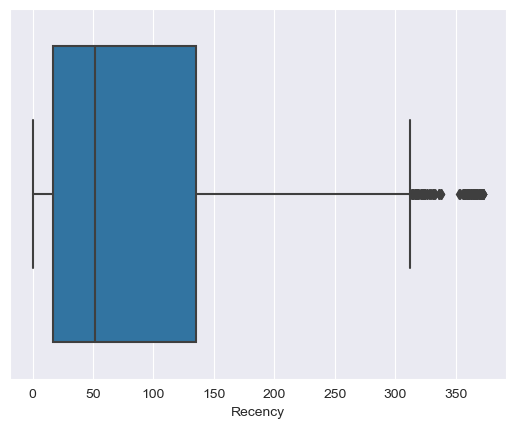

In [33]:
sns.boxplot(rfm.Recency.values)
plt.xlabel('Recency')

Text(0.5, 0, 'Top n Highest Spending Customers')

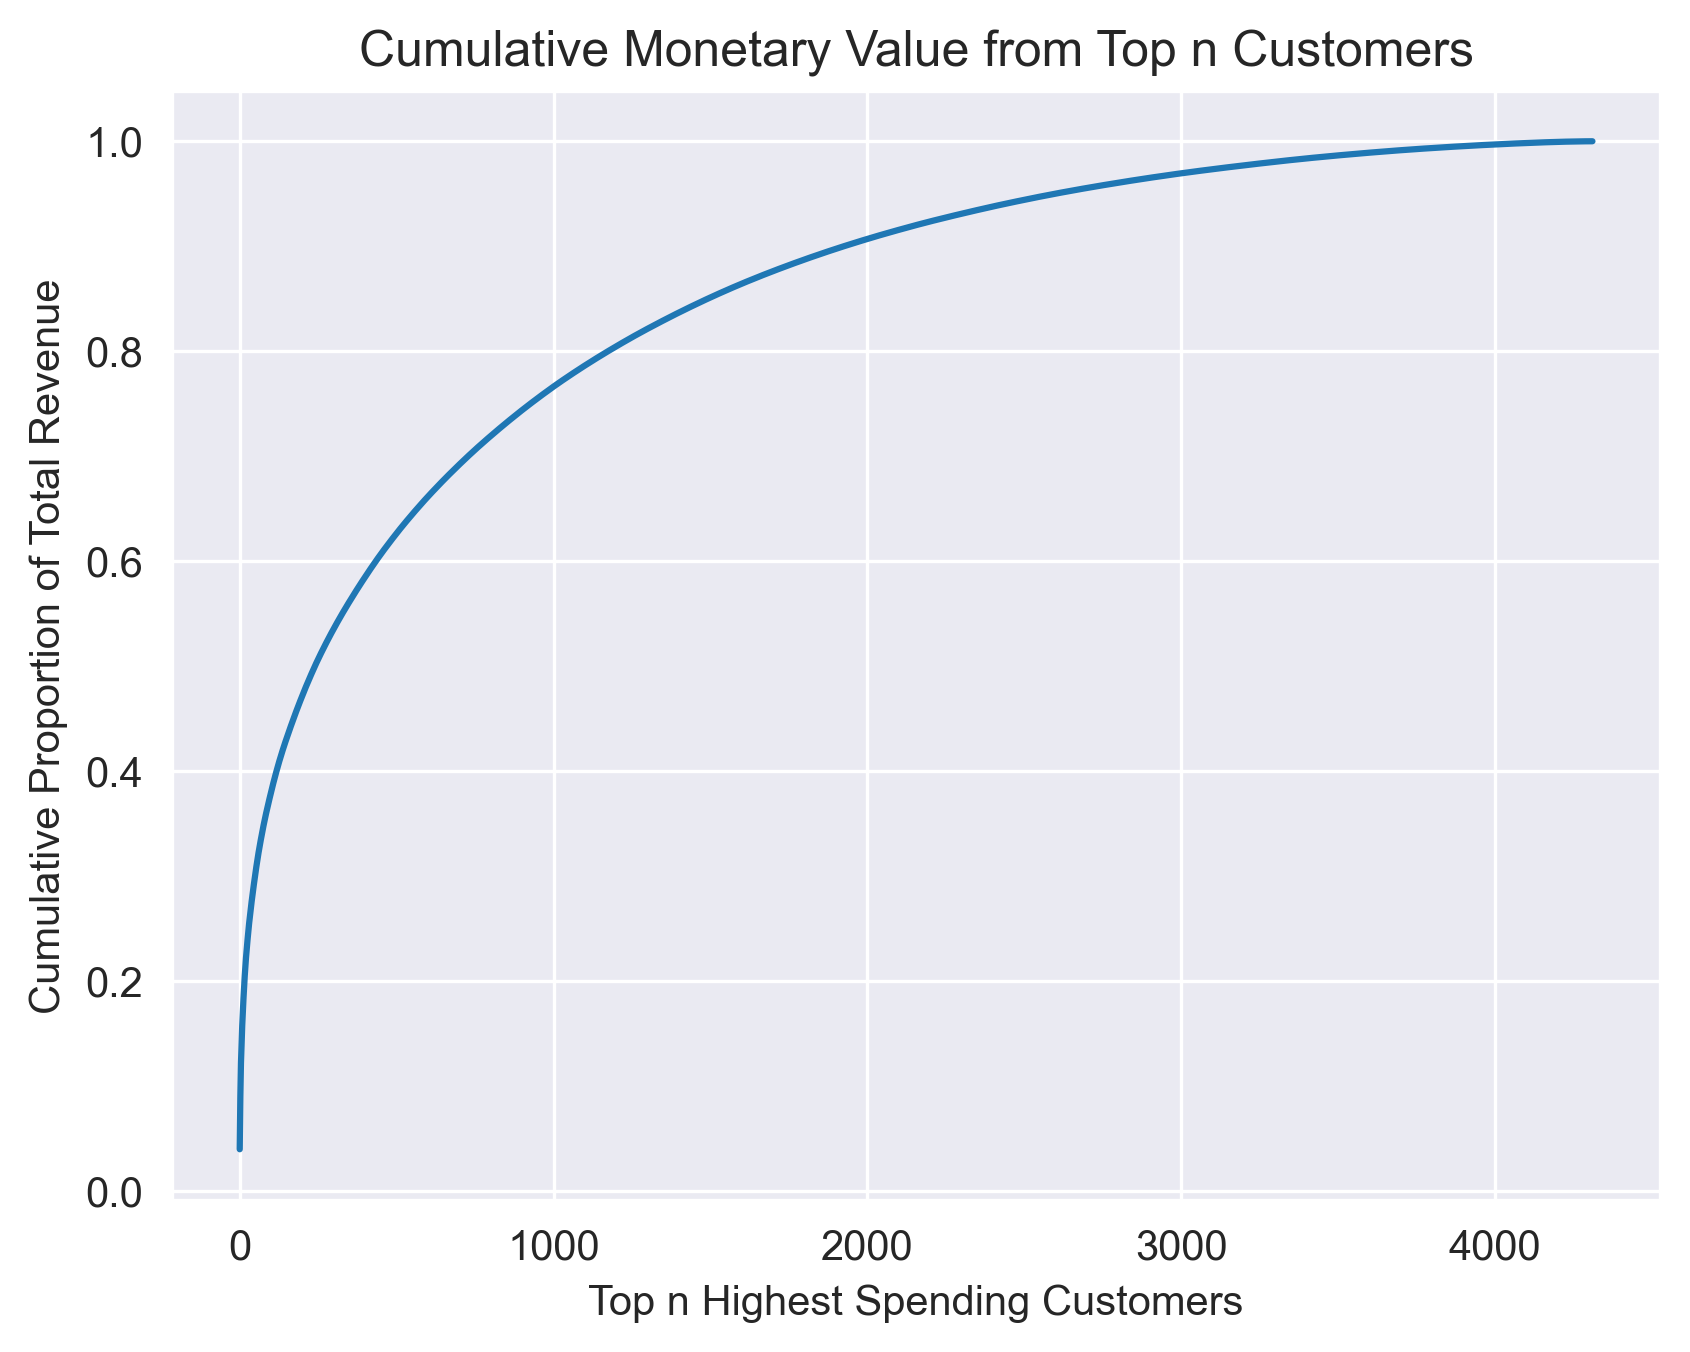

In [34]:
plt.figure(dpi=300)
msum = rfm.Monetary.sum()
(rfm['Monetary'].sort_values(ascending=False).reset_index().cumsum()['Monetary'] / msum).plot()
plt.title('Cumulative Monetary Value from Top n Customers')
plt.ylabel('Cumulative Proportion of Total Revenue')
plt.xlabel('Top n Highest Spending Customers')

<AxesSubplot:>

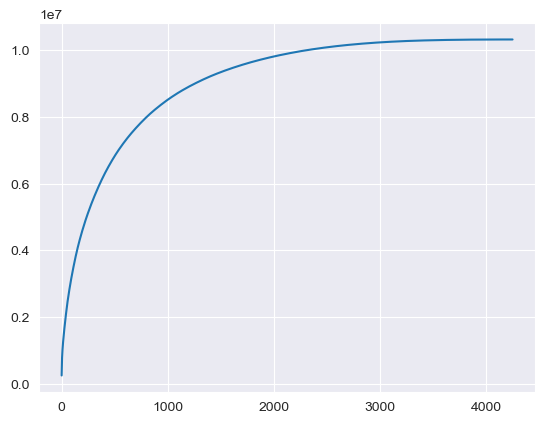

In [35]:
df_09_p.groupby('StockCode', as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).reset_index()['Total'].cumsum().plot()

In [36]:
monetary_c = (rfm['Monetary'].sort_values(ascending=False).reset_index().cumsum()['Monetary'] / msum)

In [37]:
monetary_c[250]

0.5065654376703758

In [38]:
250 / rfm.shape[0]

0.05797773654916512

In [109]:
c = ['Recency', 'Frequency', 'Monetary']
# rfm.shape
rfmno = rfm[c][(np.abs(stats.zscore(rfm[c])) < 3).all(axis=1)]

In [40]:
rfmno.Frequency

0        33
1        71
2        20
3       102
4        21
       ... 
4307    230
4308     28
4309     12
4310     67
4311     85
Name: Frequency, Length: 4254, dtype: int64

In [41]:
rfm.Frequency.quantile(0.99)

694.5600000000013

In [42]:
lin_model = LinearRegression().fit(rfmno[['Recency', 'Frequency']], rfmno.Monetary)
# mean_squared_error(lin_model.predict(rfmno[['Recency', 'Frequency']]), rfmno.Monetary)**(1/2)
lin_model.score(rfmno[['Recency', 'Frequency']], rfmno.Monetary)
lin_model.coef_

array([-1.74934052, 12.95916997])

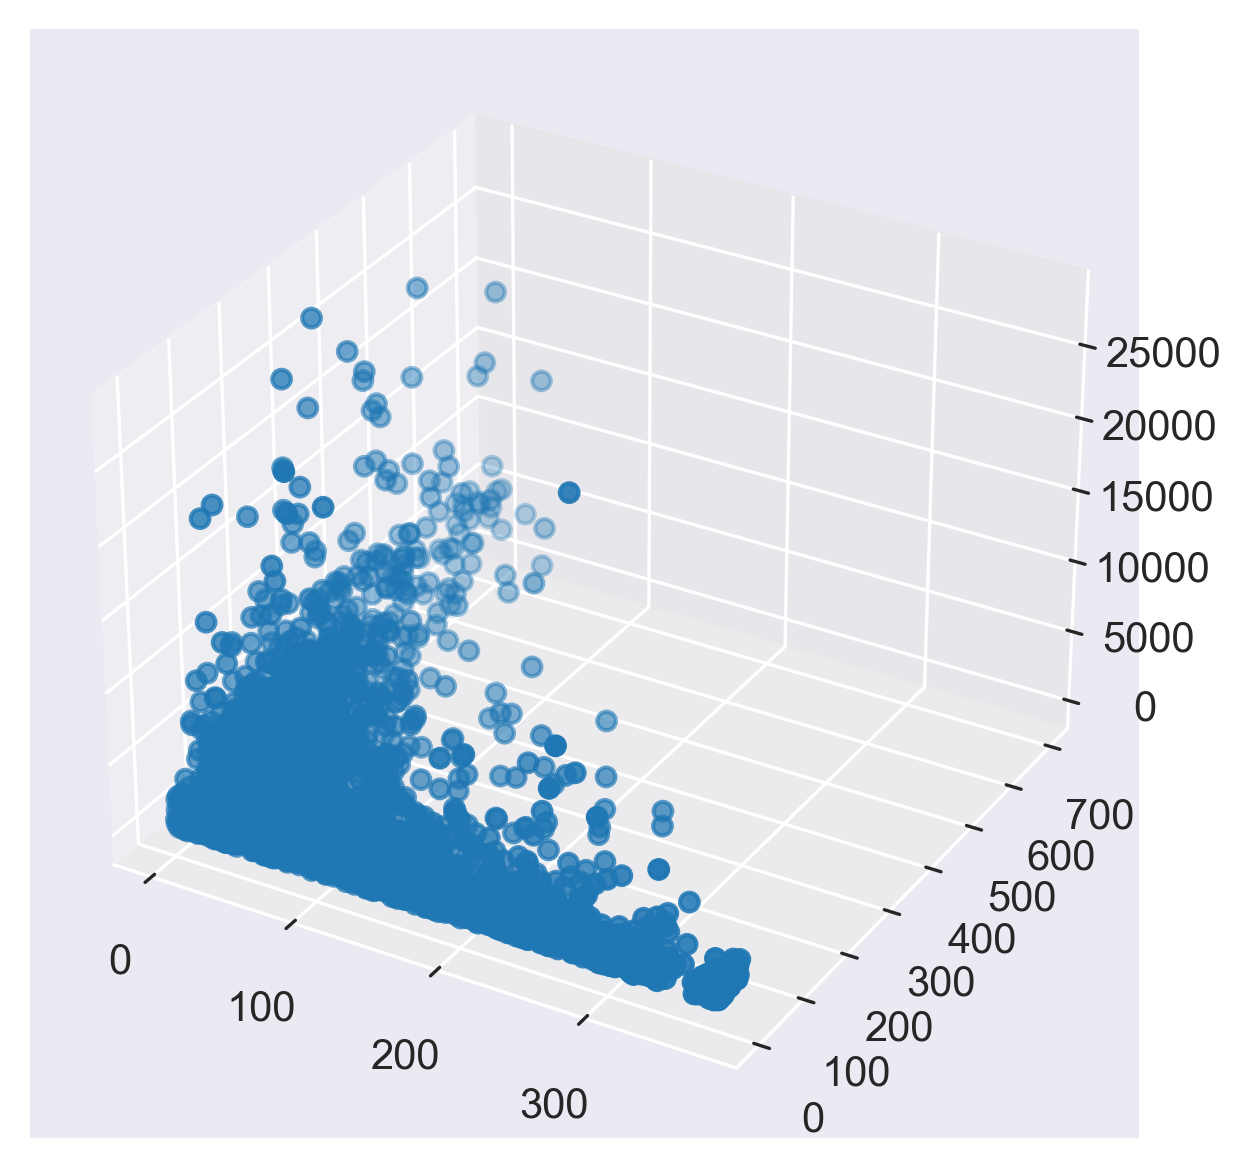

In [43]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(rfmno.Recency, rfmno.Frequency, rfmno.Monetary)
# ax.view_init(30,30)

In [144]:
rfms = StandardScaler().fit(rfm[c]).transform(rfm[c])
rfms = pd.DataFrame(rfms, columns=c)
rfmsno = rfms[c][np.abs(rfms[c] < 3).all(axis=1)]
rfmsno

,Recency,Frequency,Monetary
0,0.762299,-0.304627,-0.187961
1,-0.910402,-0.116530,-0.081329
2,-0.177305,-0.368977,-0.204868
3,-0.497389,0.036918,0.069883
4,-0.827799,-0.364027,-0.196031
...,...,...,...
4307,-0.755522,0.670509,-0.157792
4308,-0.249582,-0.329377,-0.177996
4309,2.114914,-0.408576,-0.181887
4310,0.215057,-0.136330,-0.084345


Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

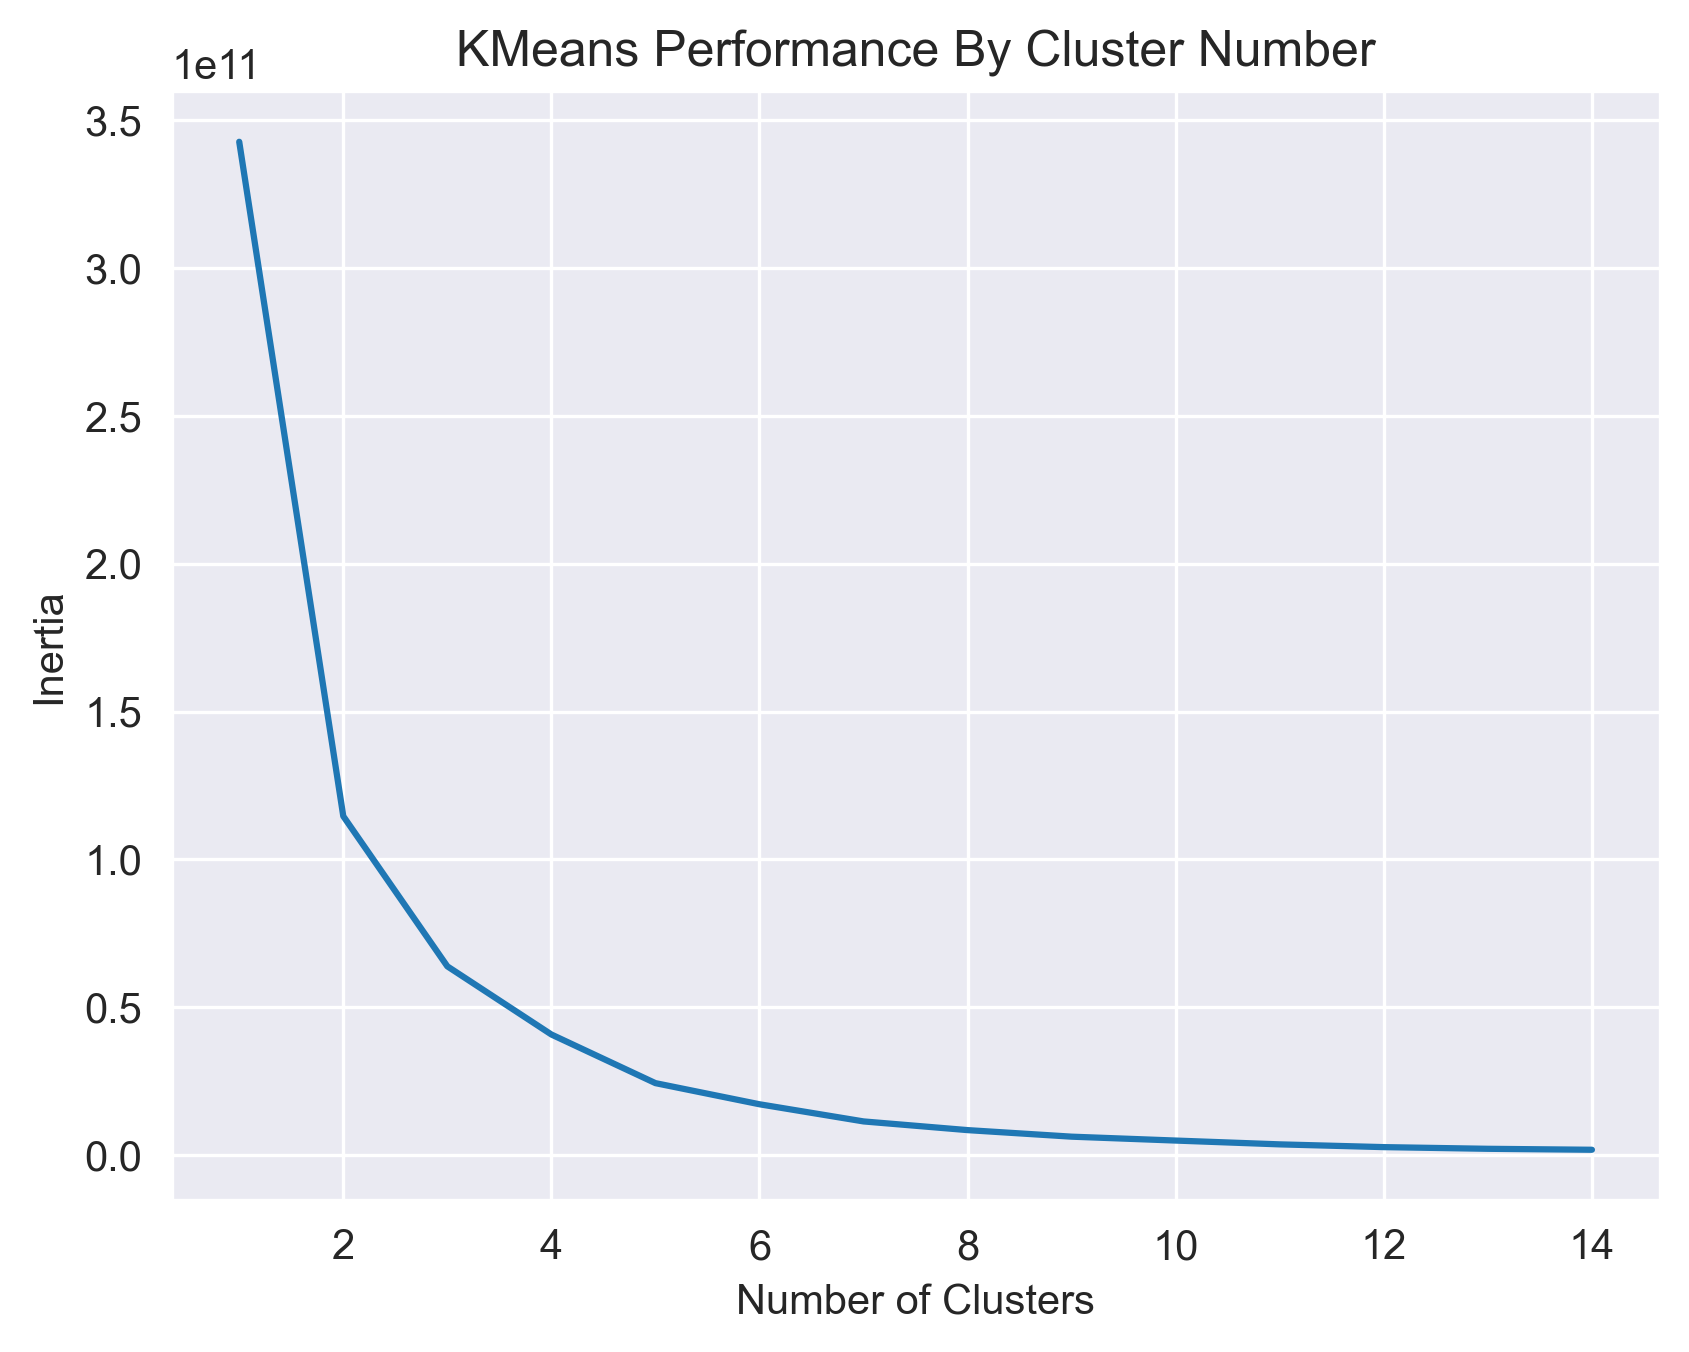

In [210]:
plt.figure(dpi=300)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfm[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

In [185]:
kp = pd.Series(KMeans(n_clusters = 3, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
rfm['Segment'] = kp

In [186]:
rfm.Segment.value_counts()

2    3245
1    1055
0      12
Name: Segment, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


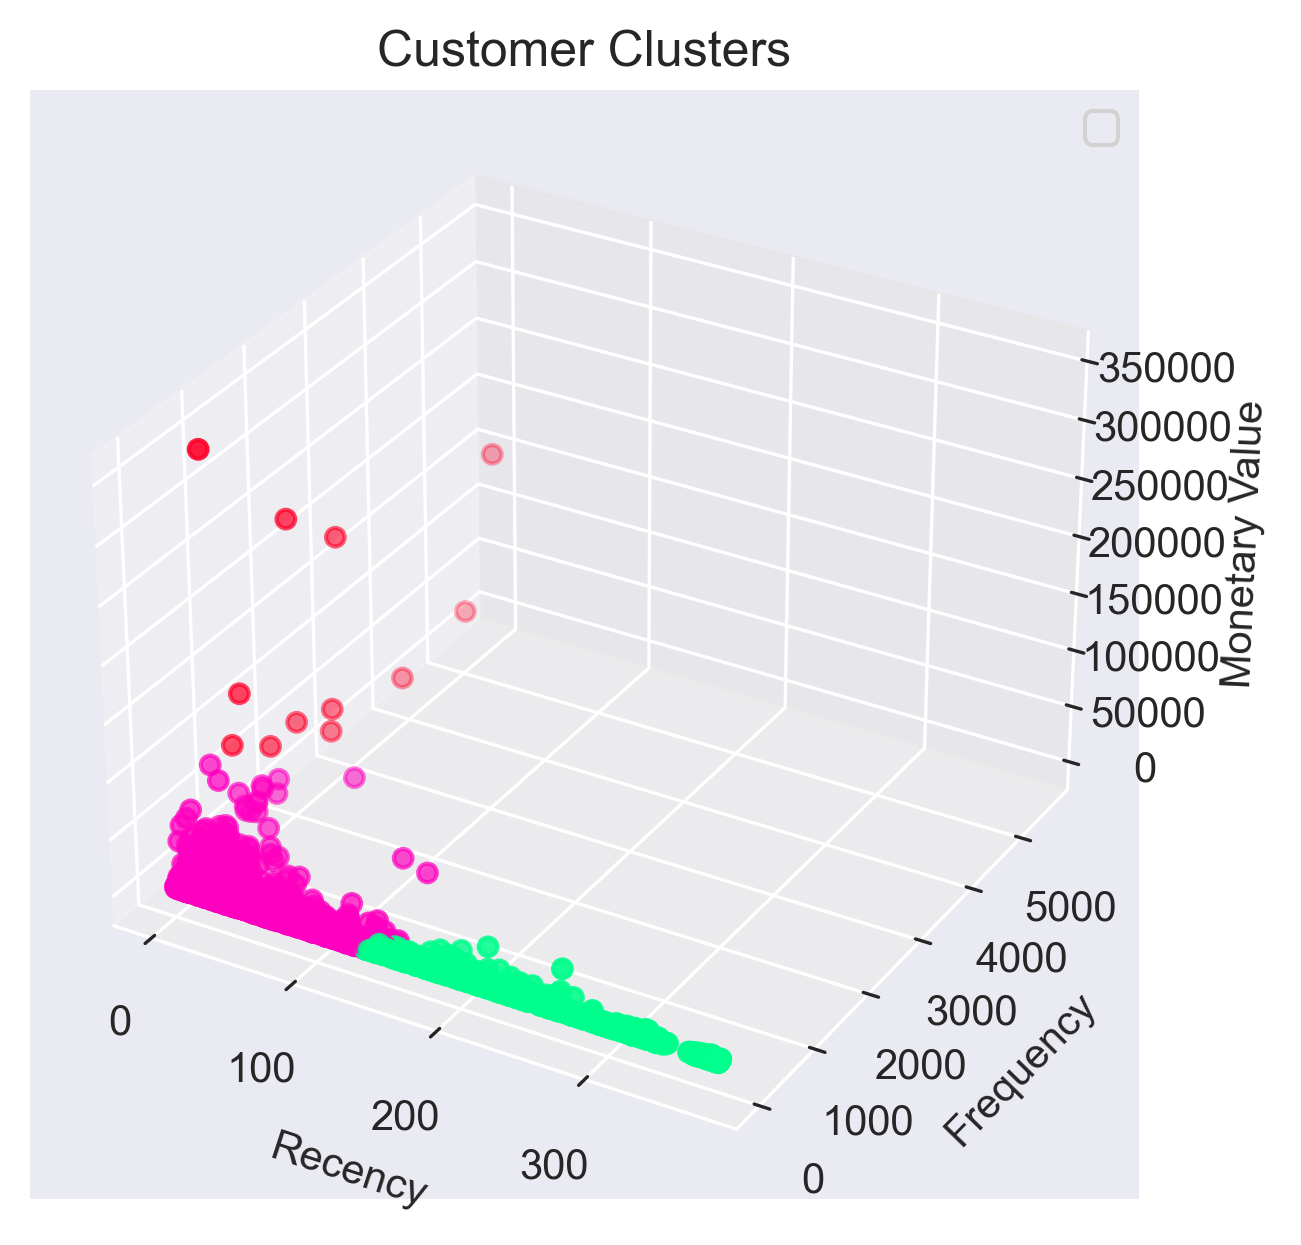

In [187]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm.Recency, rfm.Frequency, rfm.Monetary, c=rfm.Segment.values, cmap='gist_rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title('Customer Clusters')
plt.legend()

In [188]:
rfm[c + ['Segment']].groupby('Segment').mean()

,Recency,Frequency,Monetary
Segment,,,
0,3.000000,2513.583333,116571.687500
1,241.209479,29.854976,617.714155
2,41.389522,106.626810,2089.816515


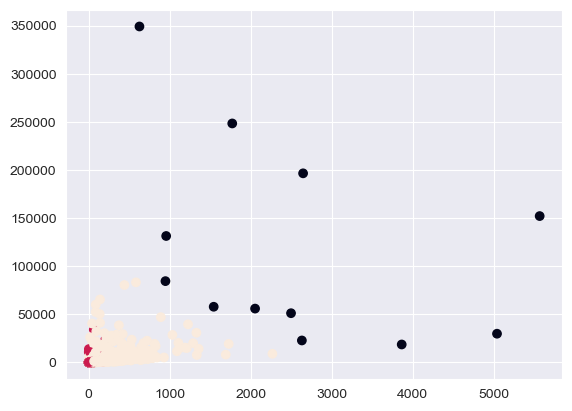

In [189]:
plt.scatter(rfm.Frequency, rfm.Monetary,c=rfm.Segment)

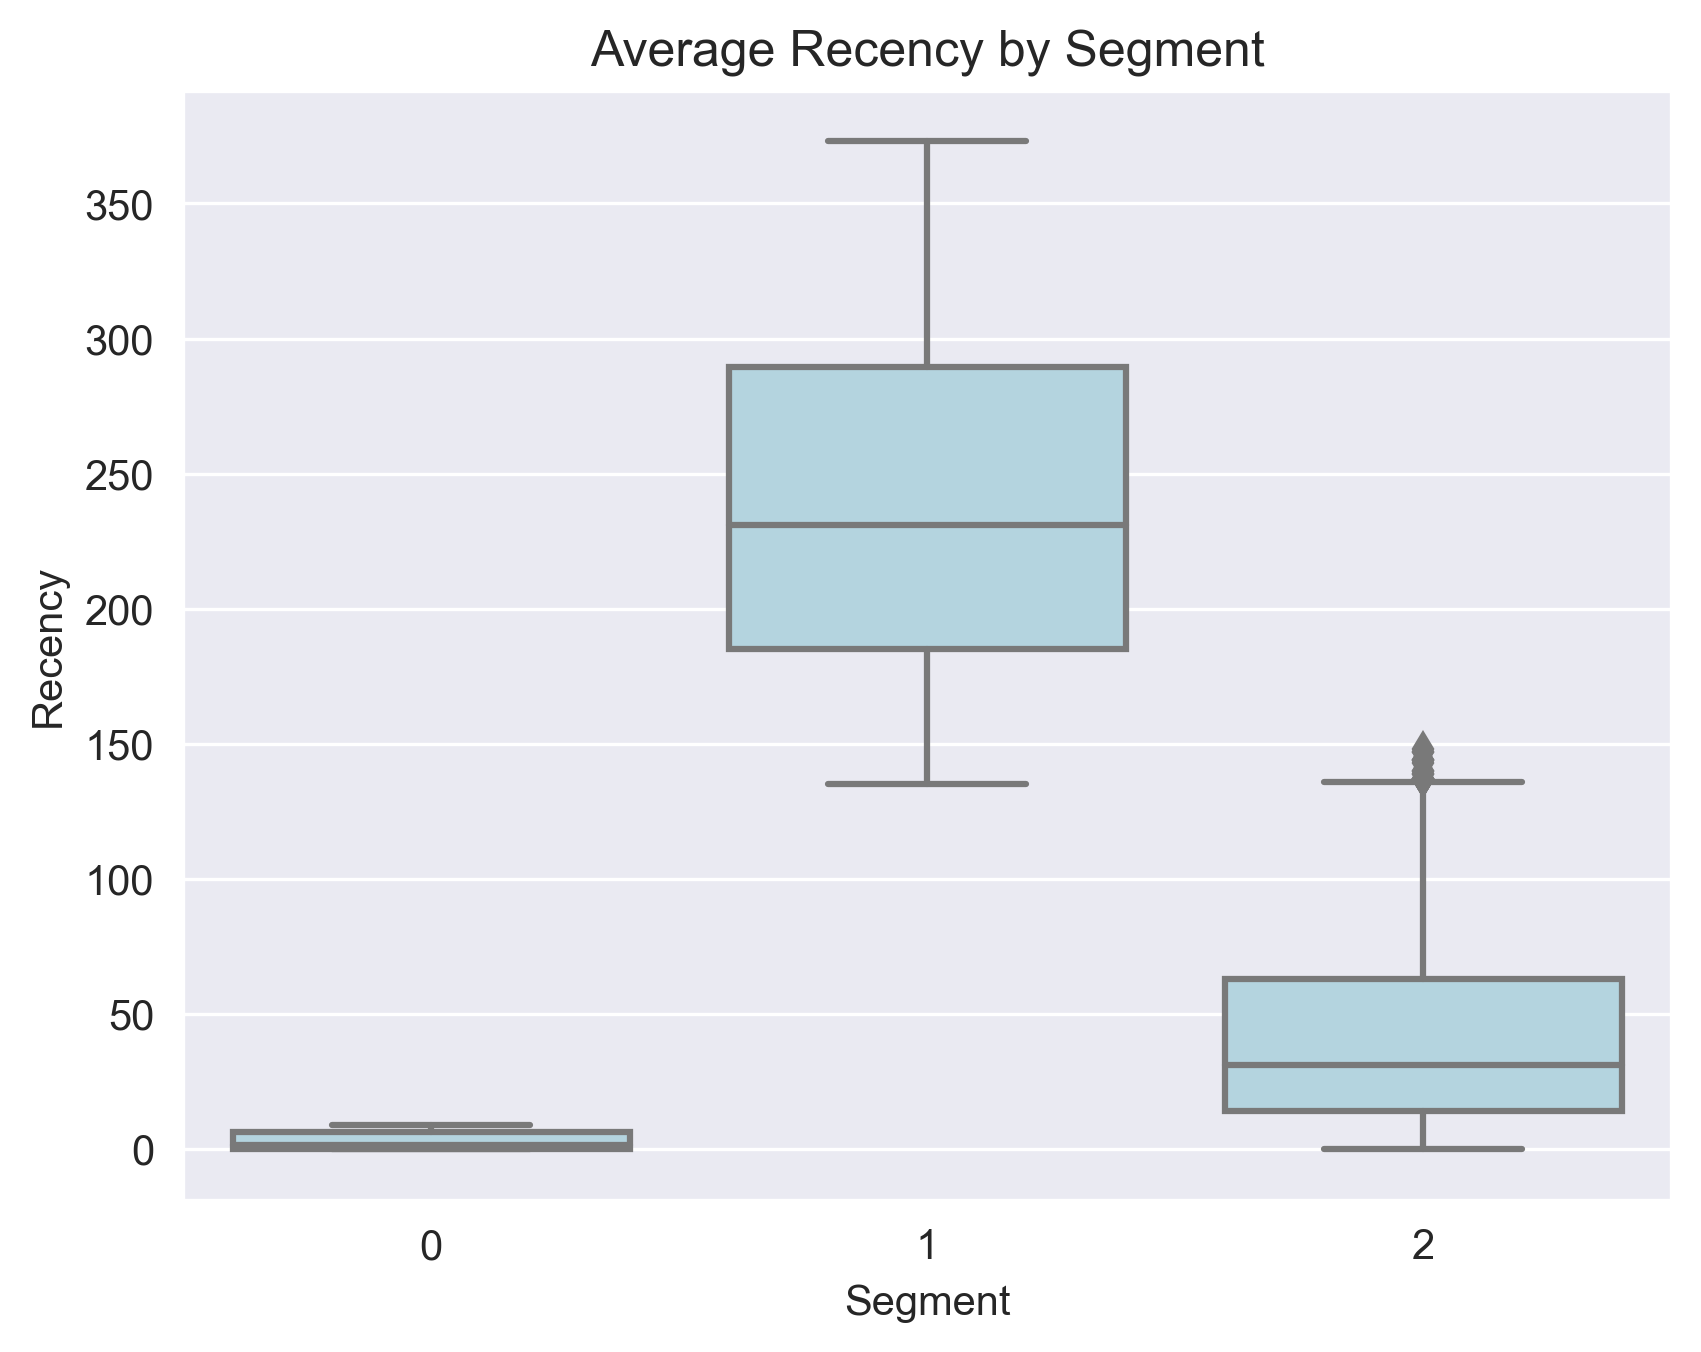

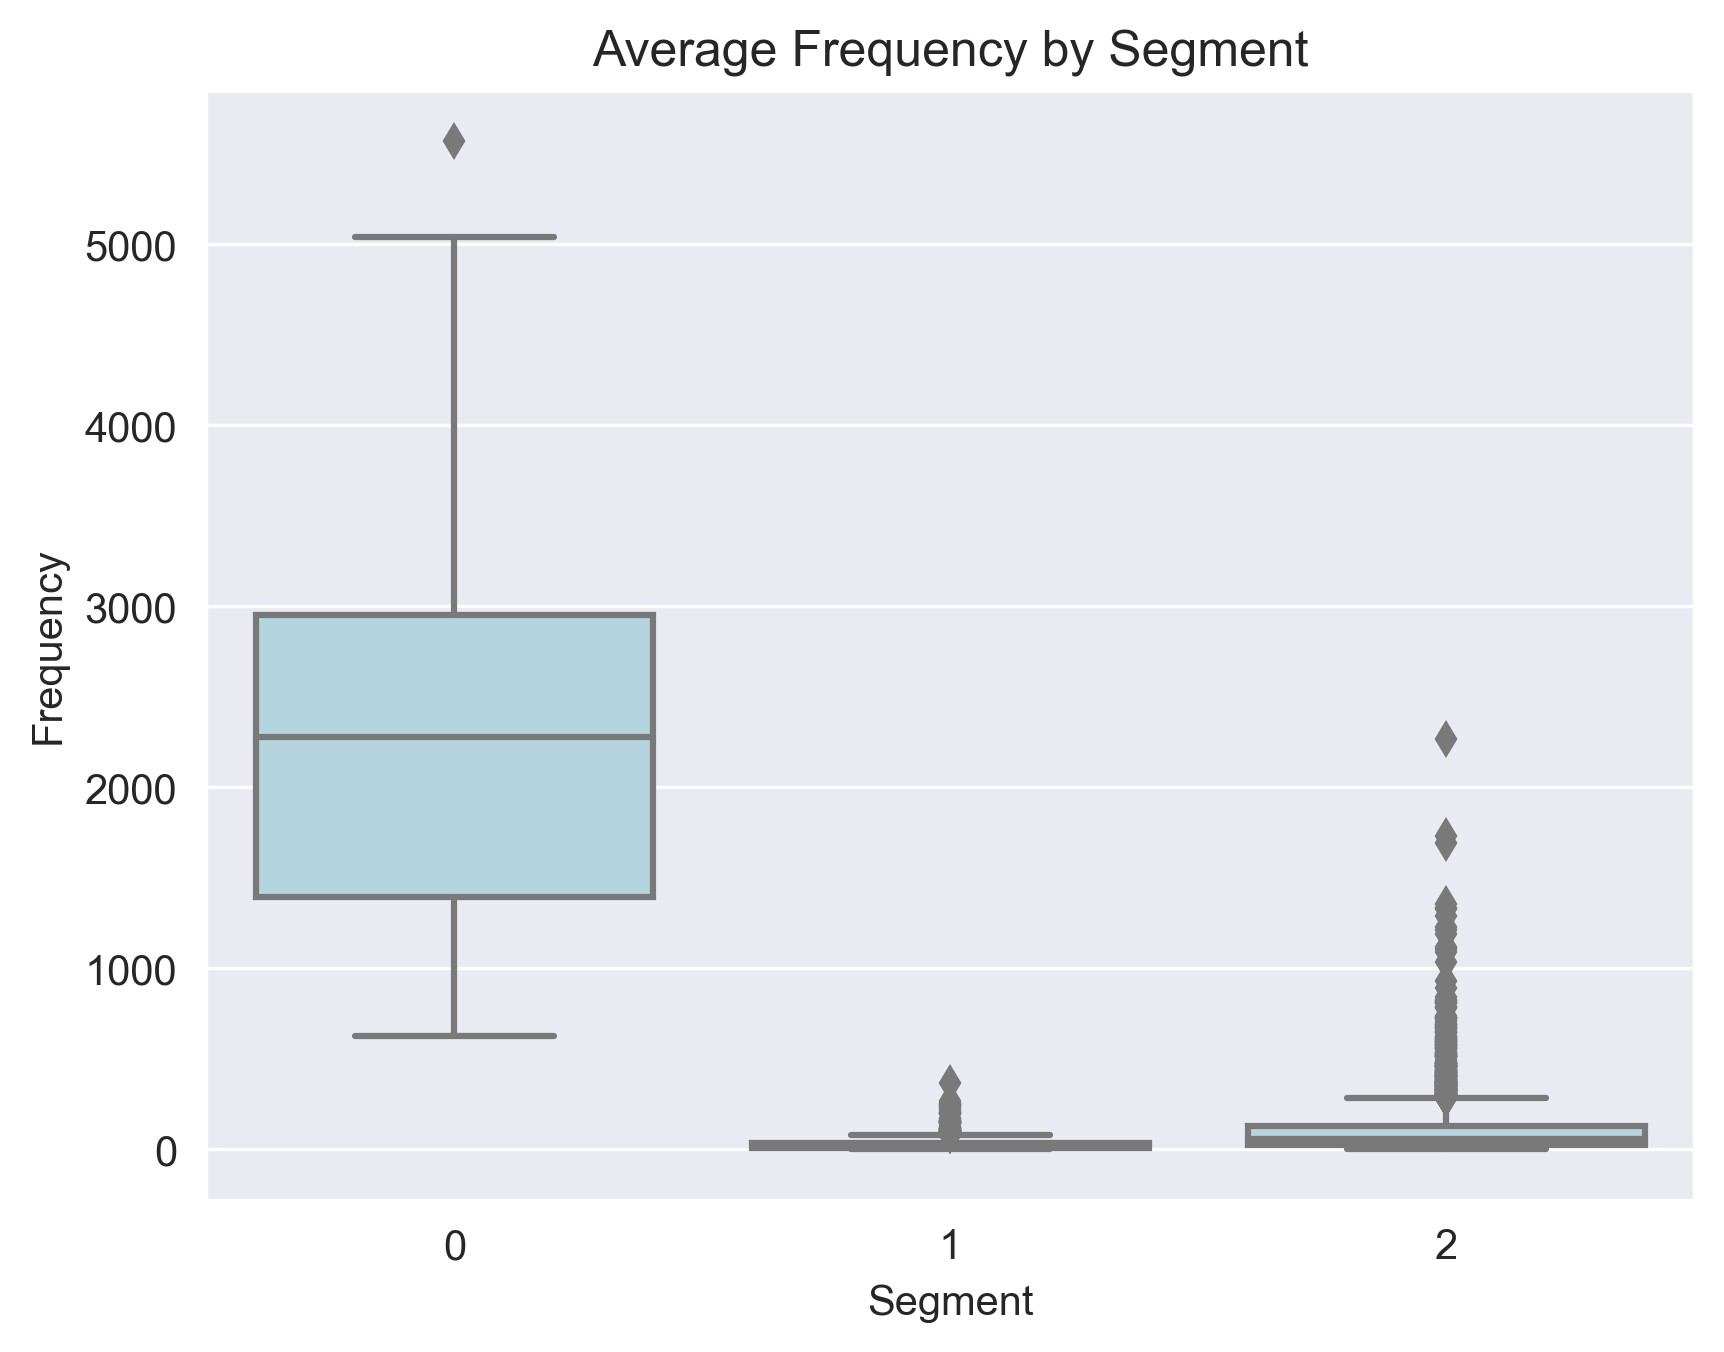

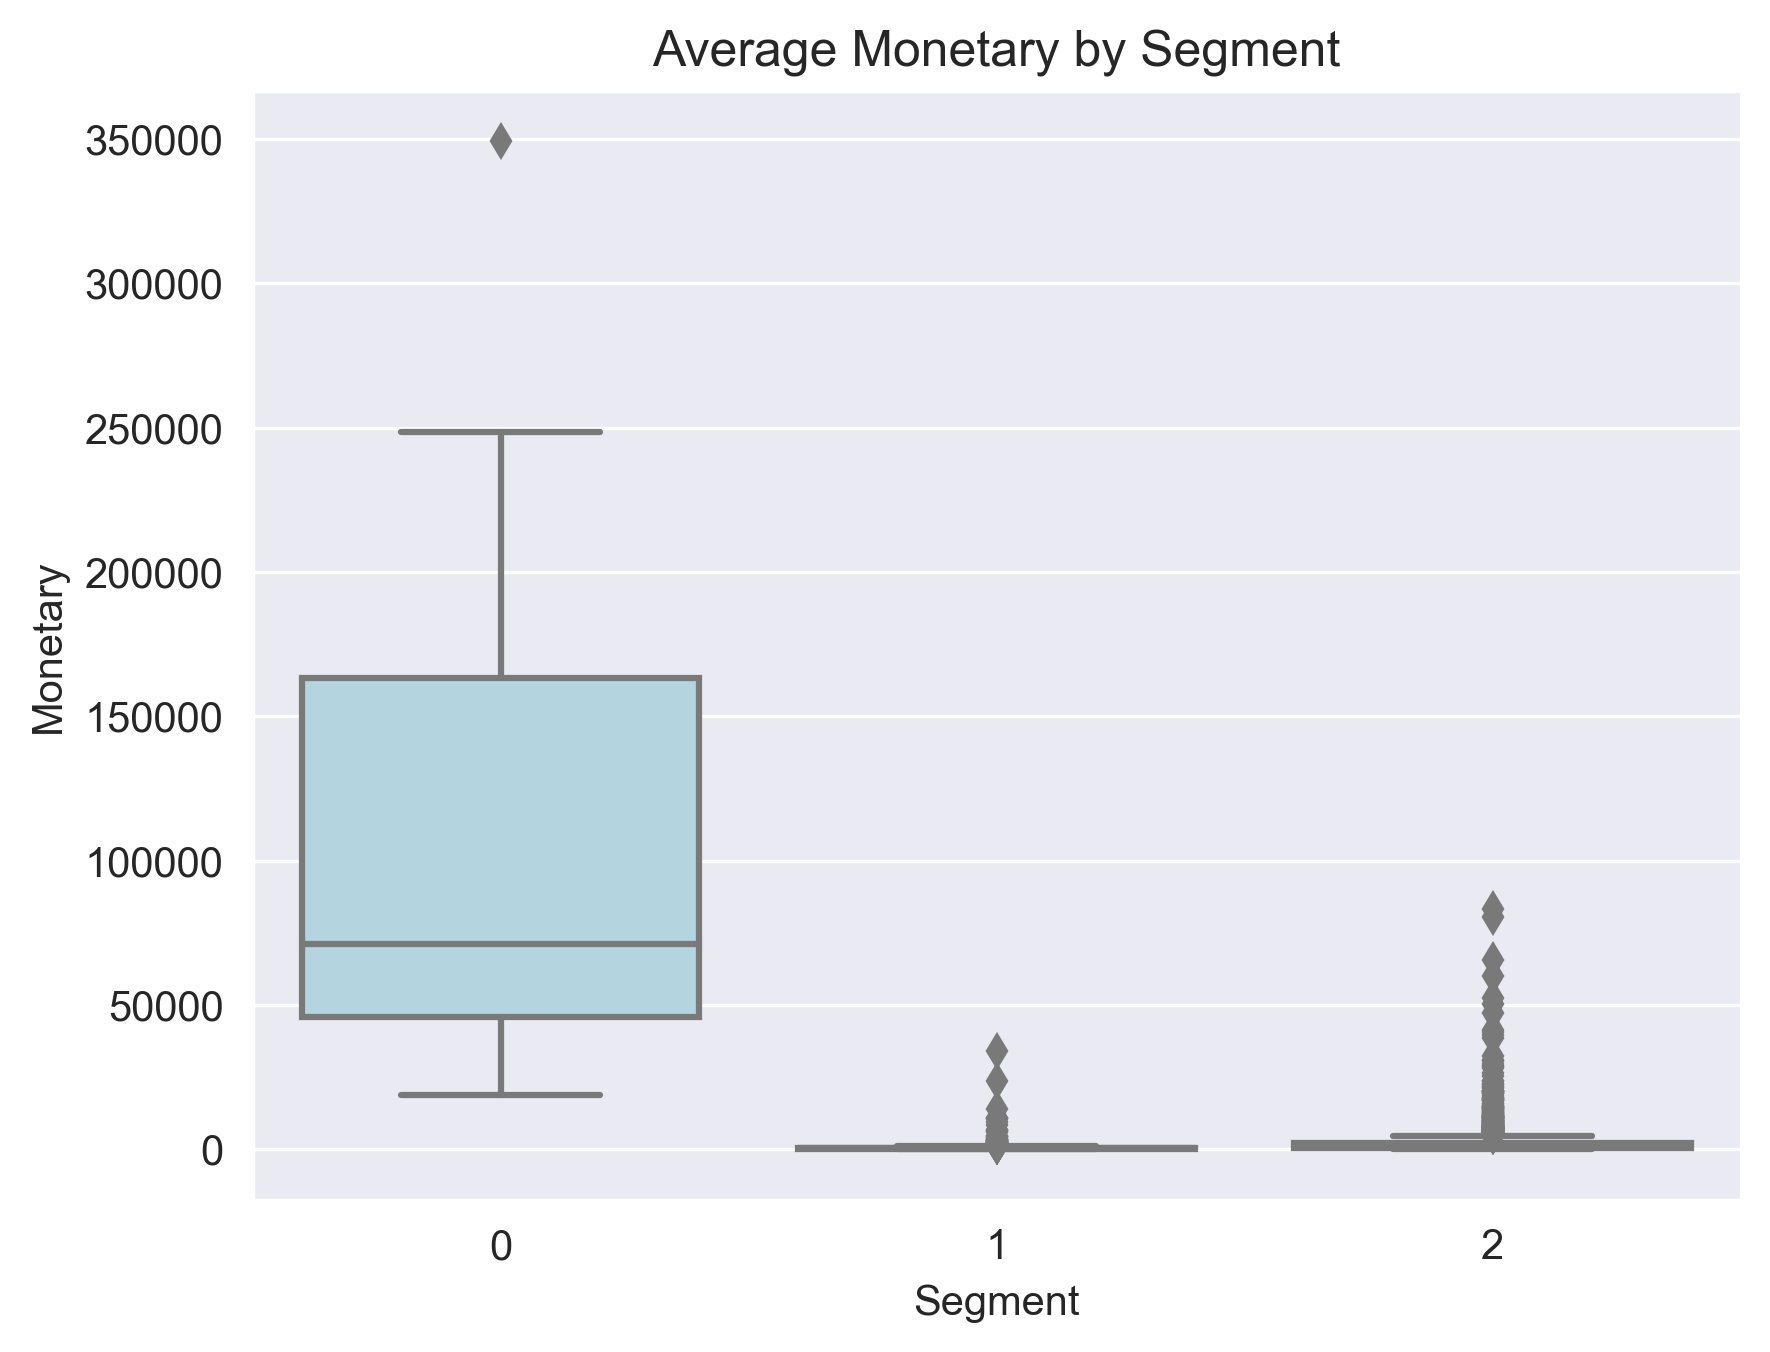

In [230]:
for col in c:
    plt.figure(dpi=300)
    plt.title('Average ' + col + ' by Segment')
    sns.boxplot(data=rfm, x='Segment', y=col, color='lightblue' )
    plt.show()

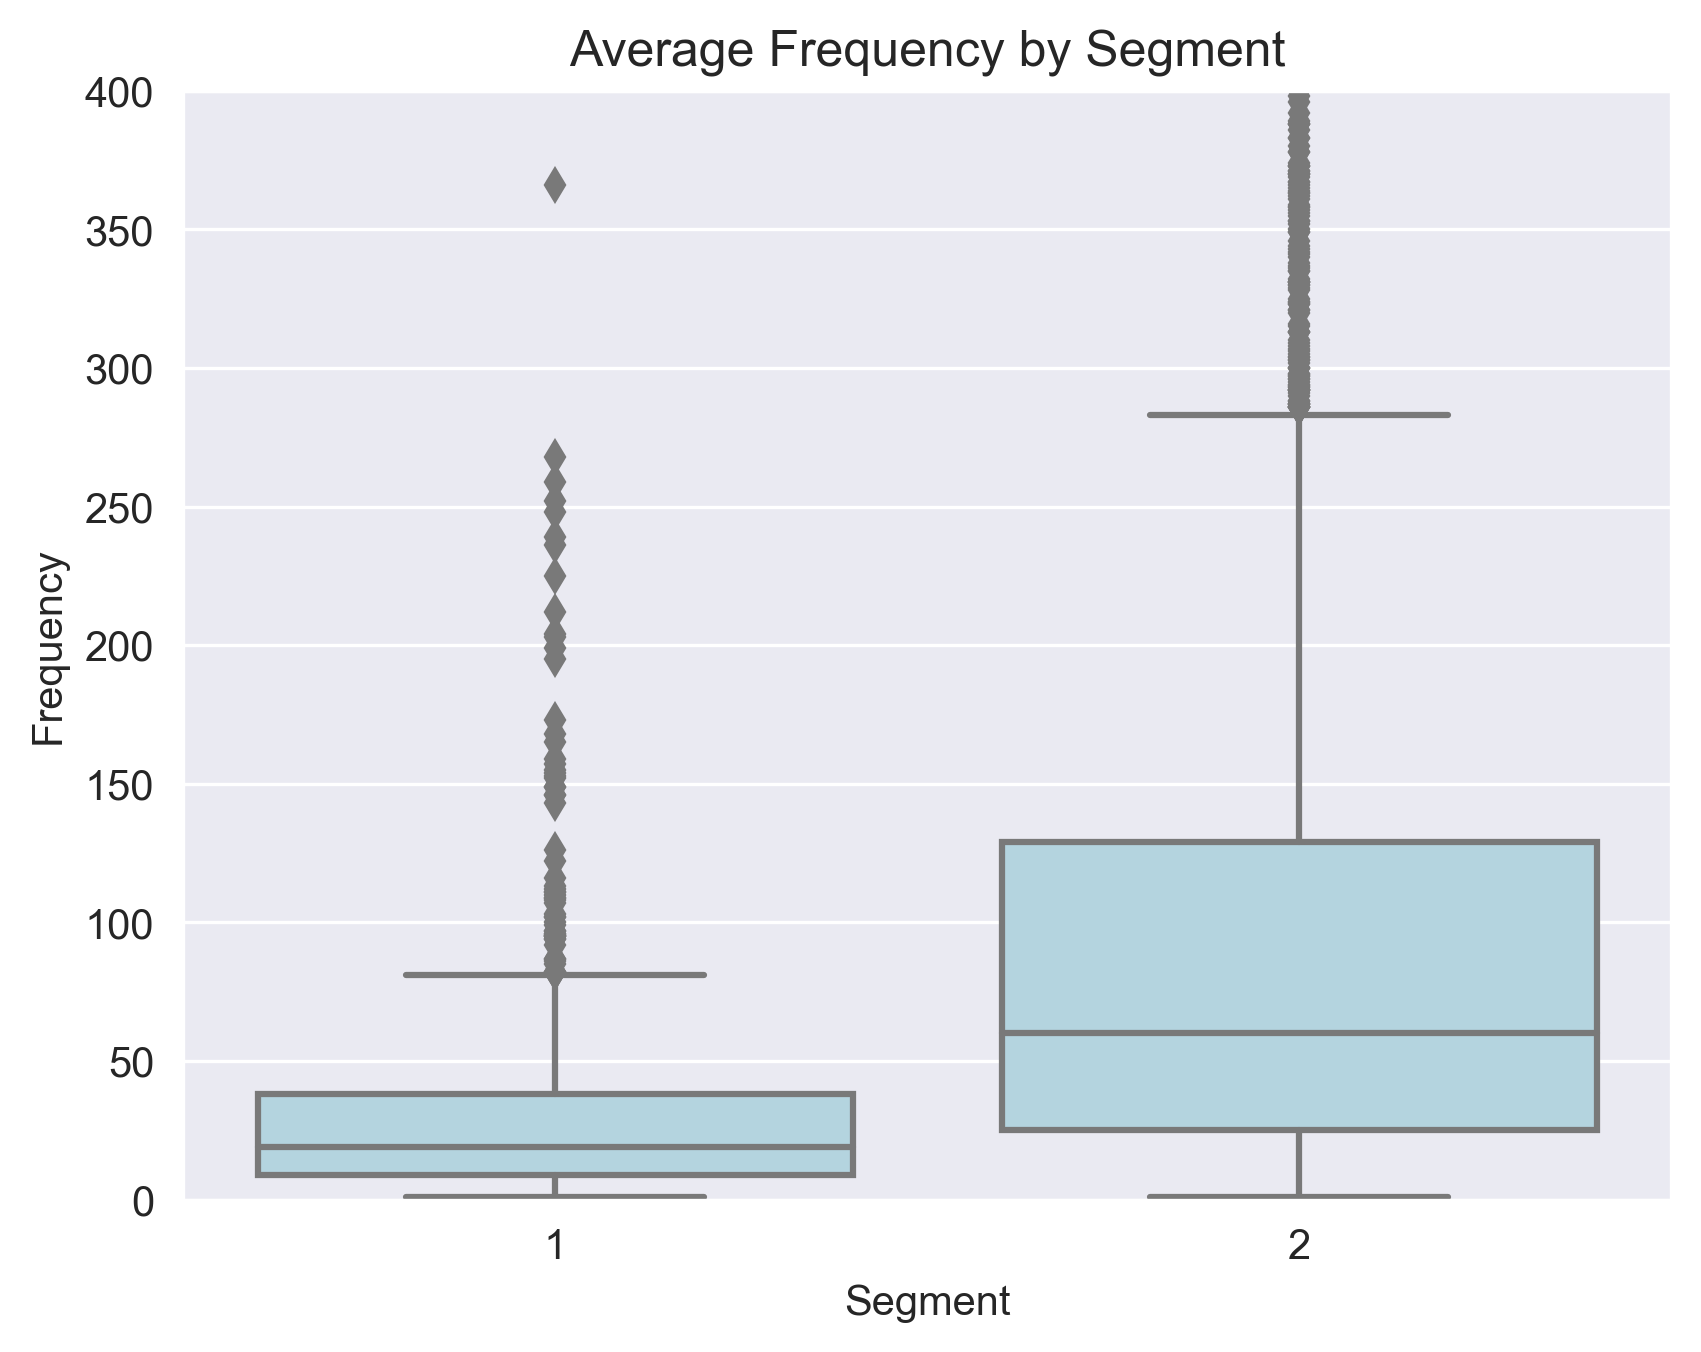

In [204]:
plt.figure(dpi=300)
plt.title('Average ' + 'Frequency' + ' by Segment')
sns.boxplot(data=rfm[(rfm.Segment == 1) | (rfm.Segment == 2)], x='Segment', y='Frequency', color='lightblue' )
plt.ylim([0,400])
plt.show()

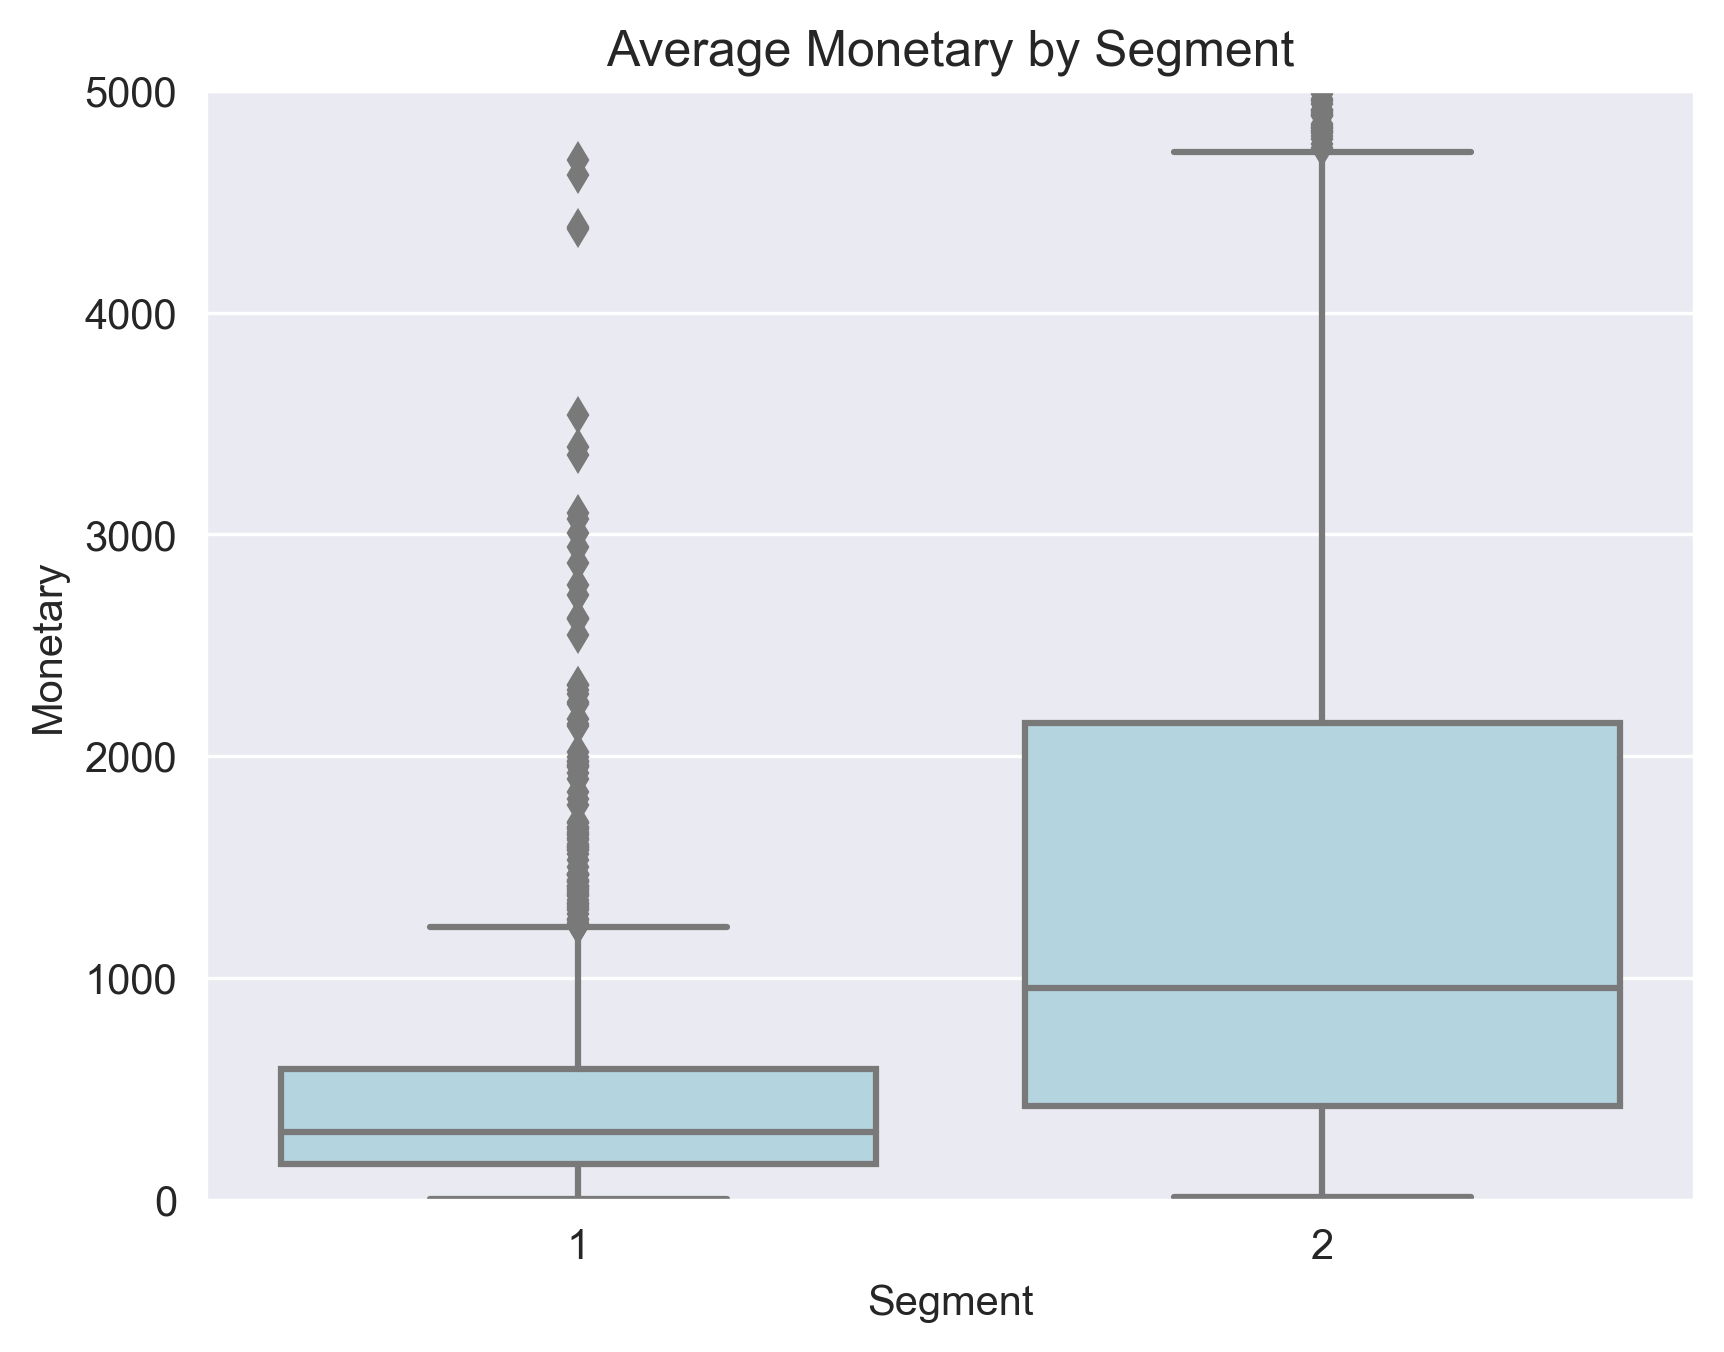

In [209]:
plt.figure(dpi=300)
plt.title('Average ' + 'Monetary' + ' by Segment')
sns.boxplot(data=rfm[(rfm.Segment == 1) | (rfm.Segment == 2)], x='Segment', y='Monetary', color='lightblue' )
plt.ylim([0,5000])
plt.show()

Text(0.5, 1.0, 'Total Monetary Value by Segment')

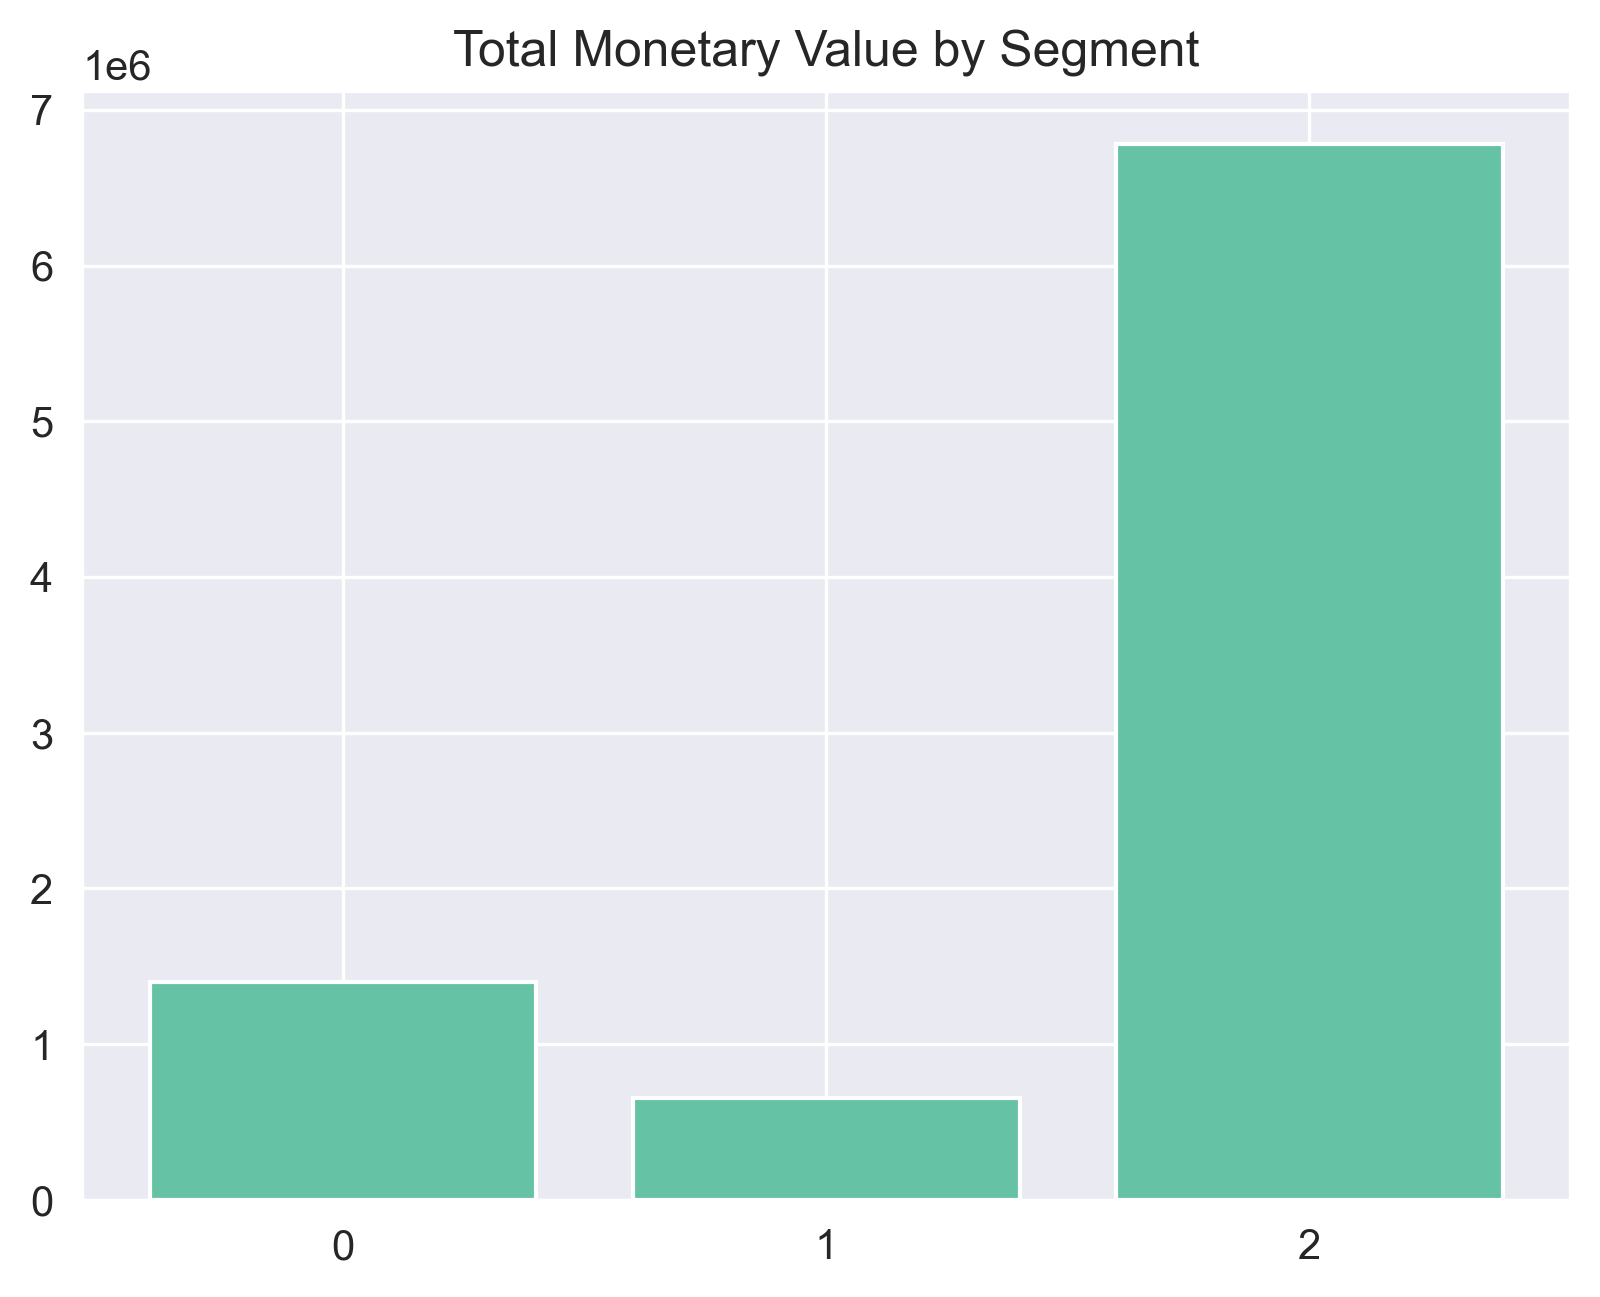

In [229]:
plt.figure(dpi=300)
plt.bar(rfm.groupby('Segment', as_index=False)['Monetary'].sum().Segment.astype(str), rfm.groupby('Segment', as_index=False)['Monetary'].sum().Monetary)
plt.title('Total Monetary Value by Segment')

Text(0, 0.5, 'Number of Customers')

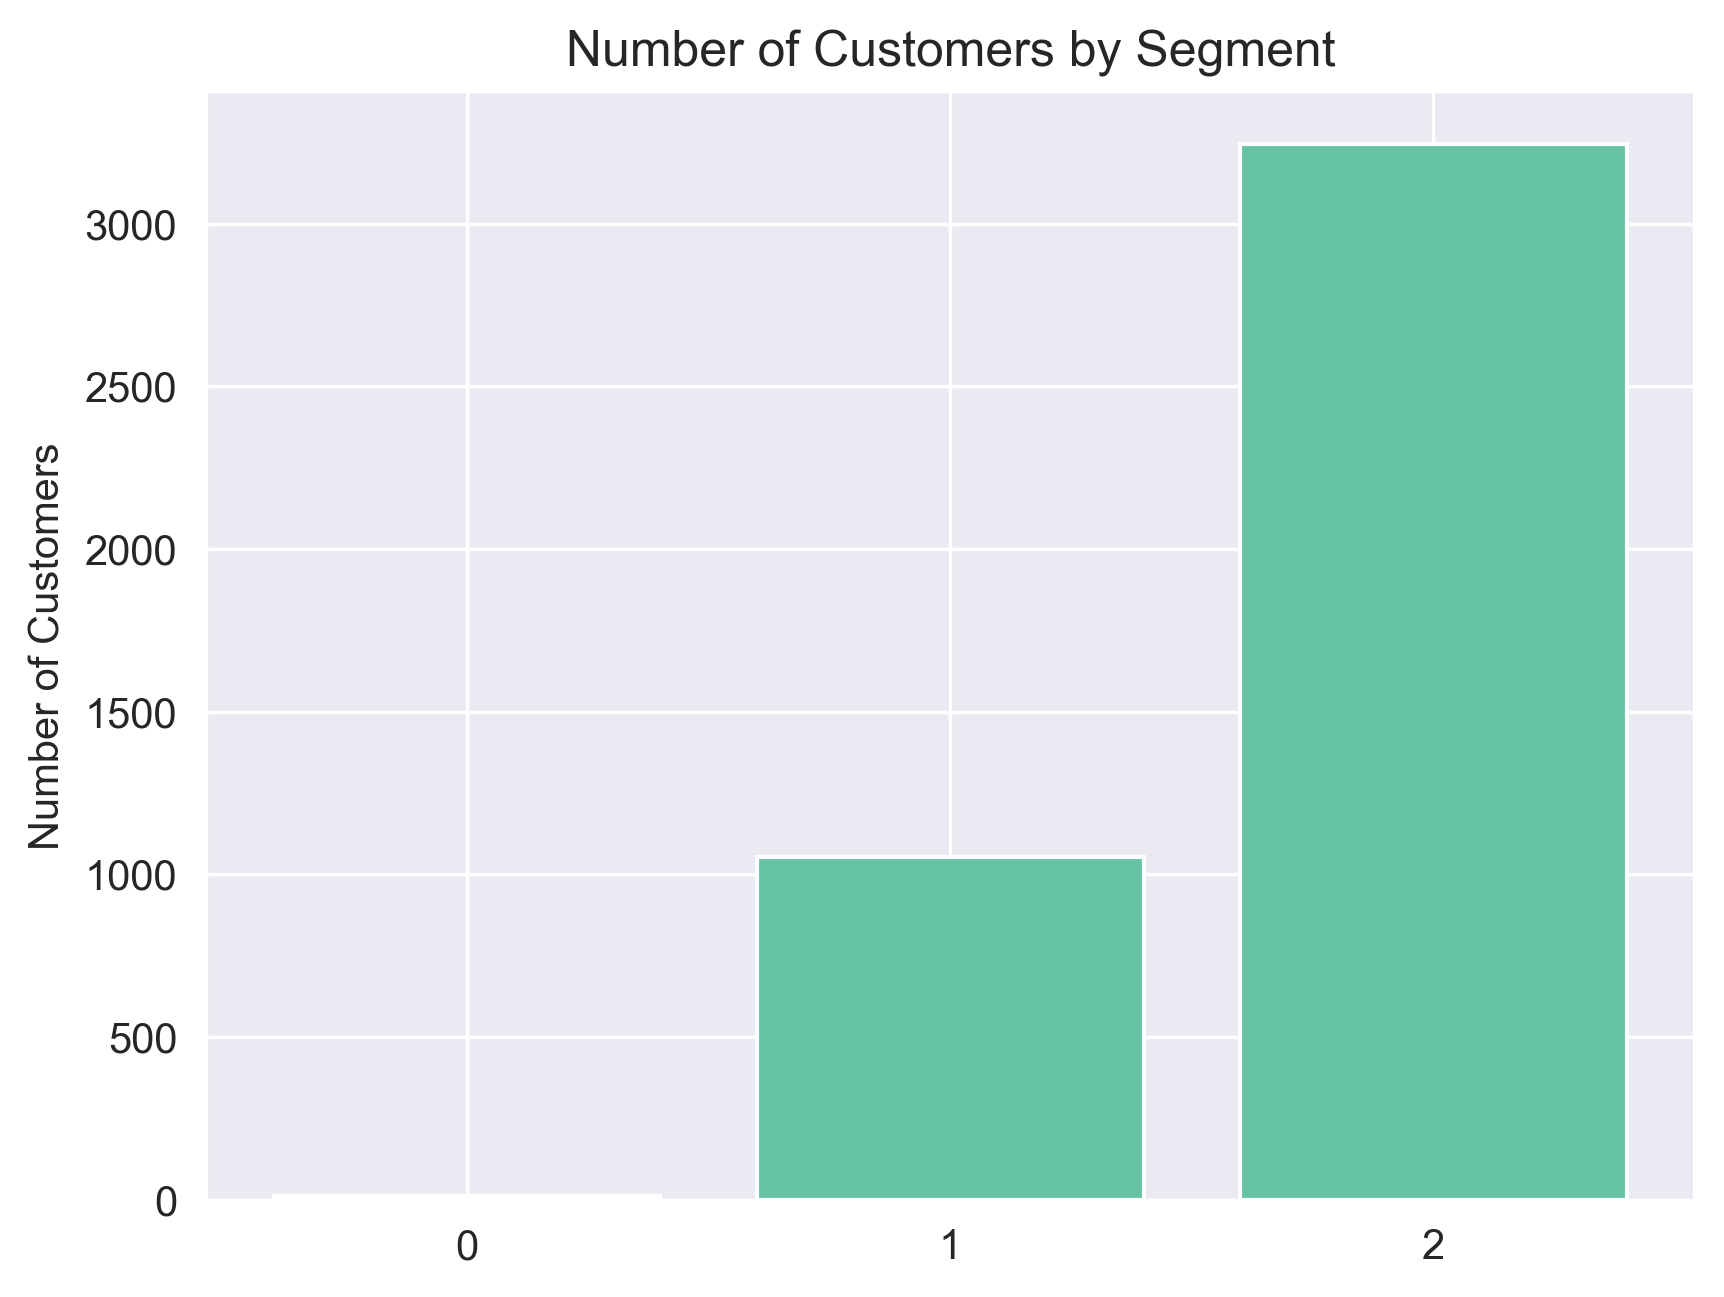

In [228]:
plt.figure(dpi=300)
plt.bar(rfm.groupby('Segment', as_index=False)['Monetary'].count().Segment.astype(str), rfm.groupby('Segment', as_index=False)['Monetary'].count().Monetary)
plt.title('Number of Customers by Segment')
plt.ylabel('Number of Customers')

In [53]:
md = df_09_p.InvoiceDate.max()
cut = md - pd.to_timedelta(90, unit='d')

In [54]:
before = df_09_p[df_09_p.InvoiceDate <= cut][['InvoiceDate', 'Customer ID', 'Total', 'Quantity', 'Price']]
br = before.groupby('Customer ID', as_index = False)['InvoiceDate'].max()
br.columns = ['Customer ID', 'LP']
mr = br['LP'].max()
br['Recency'] = br['LP'].apply(lambda x: (mr - x).days)
bf = before.groupby('Customer ID', as_index=False)['InvoiceDate'].count()
bf.columns = ['Customer ID', 'Frequency']
bm = before.groupby('Customer ID', as_index=False)['Total'].sum()
bm.columns = ['Customer ID', 'Monetary']
bm.head()

brf = br.merge(bf, on='Customer ID')
brfm = brf.merge(bm, on='Customer ID')

In [55]:
after = df_09_p[df_09_p.InvoiceDate > cut][['Customer ID', 'Total']]
after = after.groupby('Customer ID', as_index=False).sum().rename({'Total':'90 Total'}, axis=1).assign(Spent = 1)
after

,Customer ID,90 Total,Spent
0,12347.0,1323.32,1
1,12348.0,222.16,1
2,12349.0,1402.62,1
3,12351.0,300.93,1
4,12352.0,343.80,1
...,...,...,...
2872,18278.0,240.30,1
2873,18280.0,307.55,1
2874,18283.0,195.35,1
2875,18284.0,461.68,1


In [56]:
bt = brfm.merge(after, on='Customer ID', how='left').fillna(0)
bt

,Customer ID,LP,Recency,Frequency,Monetary,90 Total,Spent
0,12346.0,2010-06-28 13:53:00,74,33,372.86,0.00,0.0
1,12349.0,2010-05-18 09:57:00,115,47,1268.52,1402.62,1.0
2,12355.0,2010-05-21 11:59:00,112,22,488.21,0.00,0.0
3,12358.0,2010-06-07 12:28:00,95,35,1697.93,1021.08,1.0
4,12359.0,2010-06-22 10:24:00,80,86,2012.03,551.33,1.0
...,...,...,...,...,...,...,...
3372,18281.0,2010-05-11 10:49:00,122,10,120.32,0.00,0.0
3373,18283.0,2010-08-19 13:04:00,22,171,446.42,195.35,1.0
3374,18285.0,2010-02-17 10:24:00,205,12,427.00,0.00,0.0
3375,18286.0,2010-08-20 11:57:00,21,67,1296.43,0.00,0.0


In [57]:
spend_model = XGBClassifier().fit(bt[c], bt.Spent)

[18:00:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
spend_model.feature_importances_

array([0.2878512 , 0.4354797 , 0.27666906], dtype=float32)

In [59]:
spend_model.score(bt[c], bt.Spent)

0.9087947882736156

In [60]:
accuracy_score(bt.Spent, spend_model.predict(bt[c]))

0.9087947882736156

In [61]:
total_model = XGBRegressor().fit(bt[c], bt['90 Total'])

In [62]:
total_model.predict(bt[c])

array([148.68695, 955.2281 , 290.68427, ...,  87.98031, 473.84818,
       841.1925 ], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1920x1440 with 0 Axes>

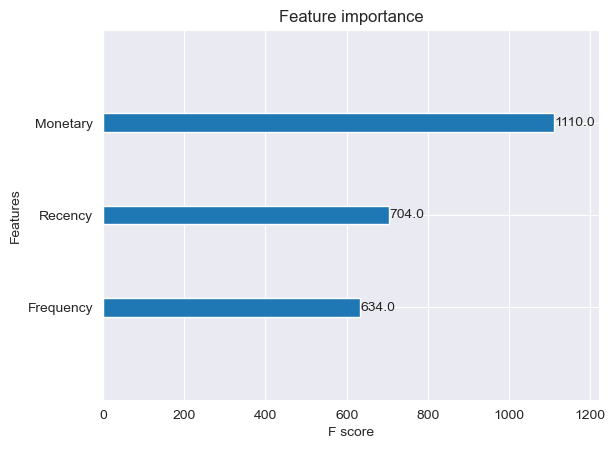

In [63]:
plt.figure(dpi=300)
plot_importance(spend_model)

Text(0.5, 1.0, 'Spend Predictor ROC Curve')

<Figure size 1920x1440 with 0 Axes>

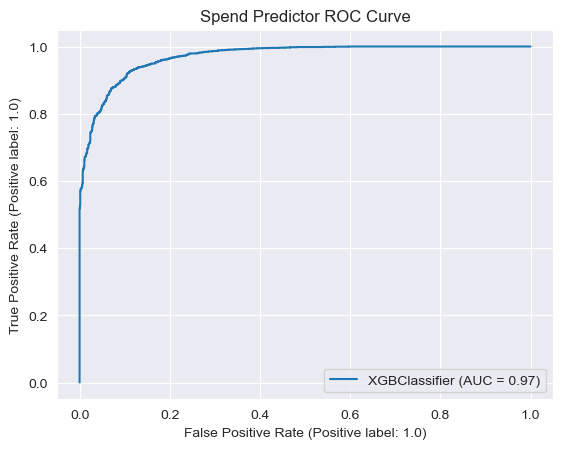

In [64]:
plt.figure(dpi=300)
plot_roc_curve(spend_model, bt[c], bt.Spent)
plt.title('Spend Predictor ROC Curve')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

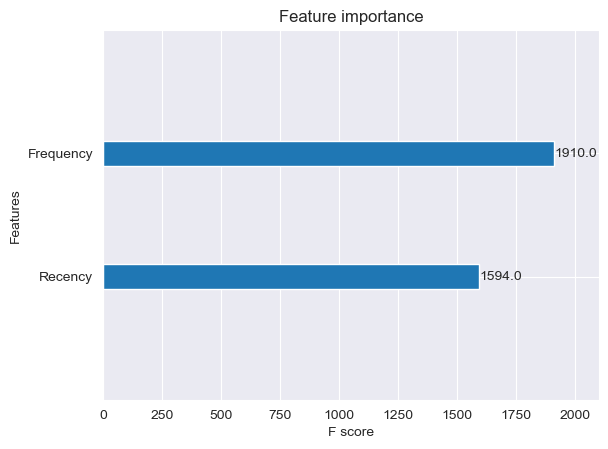

In [65]:
xgrfm = XGBRegressor().fit(rfm[['Recency', 'Frequency']], rfm.Monetary)
plot_importance(xgrfm)

In [66]:
rfmno.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.341112,-0.258482
Frequency,-0.341112,1.000000,0.574426
Monetary,-0.258482,0.574426,1.000000


In [67]:
lf = LinearRegression().fit(np.asarray(rfmno.Frequency).reshape(-1,1), rfmno.Monetary)
lf.coef_

array([13.52770789])

In [68]:
lf = LinearRegression().fit(np.asarray(rfmno.Recency).reshape(-1,1), rfmno.Monetary)
lf.coef_

array([-6.3890021])